# PFAS Toolbox - Comparison of Method 537.1 and 1633

### 1) Libraries Import (REQUIRED)

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import scipy.stats
import statsmodels.api as sm
from statsmodels.graphics.agreement import mean_diff_plot
from scipy.stats import ks_2samp


### 2) Data Import (REQUIRED)

In [2]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


#### 2.1) Read Macro

In [3]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 01-26-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


### 3) Import PFAS Compounds Attributes (REQUIRED)

In [4]:
# Import PFAS Attributes

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 01-26-2024.xlsm'
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)


In [5]:
# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

#### 3.1) Define PFAS Compound Main and TOP Assay

In [6]:
Main_Assay = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanoic acid',
             'Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanoic acid','Perfluorotridecanoic acid']

In [7]:
TOP_Assay = ['TOP-Perfluorobutanesulfonic acid','TOP-Perfluorobutanoic acid','TOP-Perfluoroheptanoic acid','TOP-Perfluorohexanesulfonic acid','TOP-Perfluorohexanoic acid','TOP-Perfluorononanoic acid',
             'TOP-Perfluorooctanesulfonic acid (PFOS)','TOP-Perfluoropentanoic acid','TOP-Perfluorotridecanoic acid']

In [8]:
Assay_537_1_mod_only =['10:2Fluorotelomersulfonic acid','Perfluorohexadecanoic acid','Perfluorooctadecanoic acid']
Assay_1633_only=['3:3 FTCA','5:3 FTCA','7:3 FTCA','Nonafluorodioxaheptanoic acid','PFEESA','Perfluoromethoxybutanoic acid','Perfluoromethoxypropoanoic acid']
both=['11Cl-PF3OUdS','4:2 Fluorotelomersulfonic acid','6:2 Fluorotelomersulfonic acid','8:2 Fluorotelomersulfonic acid','9Cl-PF3ONS','ADONA',
'HFPO-DA','NEtFOSA','NEtFOSAA','NEtFOSE','NMeFOSA','NMeFOSAA','NMeFOSE','Perfluorobutanesulfonic acid','Perfluorobutanoic acid',
'Perfluorodecanesulfonic acid','Perfluorodecanoic acid','Perfluorododecanesulfonic acid','Perfluorododecanoic acid','Perfluoroheptanesulfonic acid',
'Perfluoroheptanoic acid','Perfluorohexanesulfonic acid','Perfluorohexanoic acid','Perfluorononanesulfonic acid','Perfluorononanoic acid',
'Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)','Perfluoropentanesulfonic acid',
'Perfluoropentanoic acid','Perfluorotetradecanoic acid','Perfluorotridecanoic acid','Perfluoroundecanoic acid']
Assay_737_1_mod=Assay_537_1_mod_only+both
Assay_1633=Assay_1633_only+both

In [9]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Carboxylic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Long')]
pfas_compounds_CarboxylicAcid_Long= subset['Database'].unique()
pfas_compounds_CarboxylicAcid_Long


array(['Perfluorodecanoic acid', 'Perfluorododecanoic acid',
       'Perfluorohexadecanoic acid', 'Perfluorononanoic acid',
       'Perfluorooctadecanoic acid', 'Perfluorooctanoic acid (PFOA)',
       'Perfluorotetradecanoic acid', 'Perfluorotridecanoic acid',
       'Perfluoroundecanoic acid', 'TOP-Perfluorodecanoic acid',
       'TOP-Perfluorododecanoic acid', 'TOP-Perfluorohexadecanoic acid',
       'TOP-Perfluorononanoic acid', 'TOP-Perfluorooctadecanoic acid',
       'TOP-Perfluorooctanoic acid (PFOA)',
       'TOP-Perfluorotetradecanoic acid', 'TOP-Perfluorotridecanoic acid',
       'TOP-Perfluoroundecanoic acid'], dtype=object)

In [10]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Carboxylic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Short')]
pfas_compounds_CarboxylicAcid_Short= subset['Database'].unique()
pfas_compounds_CarboxylicAcid_Short


array(['Perfluorobutanoic acid', 'Perfluoroheptanoic acid',
       'Perfluorohexanoic acid', 'Perfluoropentanoic acid',
       'TOP-Perfluorobutanoic acid', 'TOP-Perfluoroheptanoic acid',
       'TOP-Perfluorohexanoic acid', 'TOP-Perfluoropentanoic acid'],
      dtype=object)

In [11]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Fluorotelomer Sulfonic Acid')]
pfas_compounds_FluorotelomerSulfonicAcid= subset['Database'].unique()
pfas_compounds_FluorotelomerSulfonicAcid

array(['10:2Fluorotelomersulfonic acid', '4:2 Fluorotelomersulfonic acid',
       '6:2 Fluorotelomersulfonic acid', '8:2 Fluorotelomersulfonic acid',
       'TOP-10:2Fluorotelomersulfonic acid',
       'TOP-4:2 Fluorotelomersulfonic acid',
       'TOP-6:2 Fluorotelomersulfonic acid',
       'TOP-8:2 Fluorotelomersulfonic acid'], dtype=object)

In [12]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Per- and Polyfluorother Carboxylic Acid')]
pfas_compounds_PerPolyfluorotherCarboxylicAcid= subset['Database'].unique()
pfas_compounds_PerPolyfluorotherCarboxylicAcid

array(['ADONA', 'HFPO-DA', 'Nonafluorodioxaheptanoic acid',
       'Perfluoromethoxybutanoic acid', 'Perfluoromethoxypropoanoic acid',
       'TOP-ADONA', 'TOP-HFPO-DA'], dtype=object)

In [13]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Perfluorooctane Sulfonamidoacetic Acid')]
pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid= subset['Database'].unique()
pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid

array(['NEtFOSAA', 'NMeFOSAA', 'TOP-NEtFOSAA', 'TOP-NMeFOSAA'],
      dtype=object)

In [14]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Perfluorooctane Sulfonamide Ethanol')]
pfas_compounds_PerfluorooctaneSulfonamideEthanol= subset['Database'].unique()
pfas_compounds_PerfluorooctaneSulfonamideEthanol

array(['NEtFOSE', 'NMeFOSE'], dtype=object)

In [15]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Sulfonic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Long')]
pfas_compounds_SulfonicAcid_Long= subset['Database'].unique()
pfas_compounds_SulfonicAcid_Long

array(['Perfluorodecanesulfonic acid', 'Perfluorododecanesulfonic acid',
       'Perfluoroheptanesulfonic acid', 'Perfluorohexanesulfonic acid',
       'Perfluorononanesulfonic acid',
       'Perfluorooctanesulfonic acid (PFOS)',
       'TOP-Perfluorododecanesulfonic acid',
       'TOP-Perfluorodecanesulfonic acid',
       'TOP-Perfluoroheptanesulfonic acid',
       'TOP-Perfluorohexanesulfonic acid',
       'TOP-Perfluorononanesulfonic acid',
       'TOP-Perfluorooctanesulfonic acid (PFOS)'], dtype=object)

In [16]:
subset=df_PFAS_Attributes[(df_PFAS_Attributes['Class (1633)'] == 'Sulfonic Acid') & (df_PFAS_Attributes['Chain Class'] == 'Short')]
pfas_compounds_SulfonicAcid_Short= subset['Database'].unique()
pfas_compounds_SulfonicAcid_Short

array(['Perfluorobutanesulfonic acid', 'Perfluoropentanesulfonic acid',
       'TOP-Perfluoropentanesulfonic acid',
       'TOP-Perfluorobutanesulfonic acid'], dtype=object)

### 4) Prepare Subset of Data

#### 4.1) Functions

In [17]:
def filter_dataframe(data_df, start_date, end_date, pfas_compounds, qual_grades):
    """
    Filter a DataFrame based on a date range in 'Sample Date', a list of values in 'PFAS Compound',
    and a list of values in 'Qual Summary (Grade for filtering)'.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        start_date (str): The start date for filtering 'Sample Date'.
        end_date (str): The end date for filtering 'Sample Date'.
        pfas_compounds (list): List of 'PFAS Compound' values to filter.
        qual_grades (list): List of 'Qual Summary (Grade for filtering)' values to filter.

    Returns:
        pd.DataFrame: The filtered dataframe.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply the date range filter
    filtered_df = data_df[
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) & 
        (data_df['Sample Date'] <= pd.to_datetime(end_date))
    ]

    # Filter by 'PFAS Compound'
    filtered_df = filtered_df[filtered_df['PFAS Compound'].isin(pfas_compounds)]

    # Filter by 'Qual Summary (Grade for filtering)'
    filtered_df = filtered_df[filtered_df['Qual Summary (Grade for filtering)'].isin(qual_grades)]

    return filtered_df


#### 4.2) Set Filters

In [18]:
start_date='2023-12-01'
end_date='2023-12-30'
pfas_compounds=both
qual_grades=['Good','Probably Ok','']

#### 4.3) Prepare Subset of Data

In [19]:
subset_df=filter_dataframe(data_df, start_date, end_date, pfas_compounds,qual_grades)
subset_df=subset_df[['Result','Analysis Method','Sample Location','Type','Sample Date','PFAS Compound','MDL','Detection Class','Quant Only Incl Qual Flags',
           'Quant Incl Estimates Incl Qual Flags','All (w BDL= MDL/2) Incl Qual Flags','Units','ChainLength','Dominant Contributor',
           'Sector']]

In [20]:
subset_df_1633=subset_df[subset_df['Analysis Method']==1633]
subset_df_537=subset_df[subset_df['Analysis Method']=='537.1 (mod)']

In [21]:
# Total number of rows in the DataFrame
total_rows = len(subset_df_1633)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_1633 = subset_df_1633.groupby('Detection Class').size()
# Calculate the percentage
grouped_percentage_1633 = (grouped_counts_1633 / total_rows) * 100

print('1633 method records by Detection class')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_1633)
print(grouped_percentage_1633)

1633 method records by Detection class
Detection Class
BDL      1168
BQL       115
Quant     142
dtype: int64
Detection Class
BDL      81.964912
BQL       8.070175
Quant     9.964912
dtype: float64


In [22]:
# Total number of rows in the DataFrame
total_rows = len(subset_df_537)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_537 = subset_df_537.groupby('Detection Class').size()
# Calculate the percentage
grouped_percentage_1633 = (grouped_counts_537 / total_rows) * 100

print('537.1 method records by Detection class')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_537)
print(grouped_percentage_1633)

537.1 method records by Detection class
Detection Class
BDL      131
BQL       39
Quant     54
dtype: int64
Detection Class
BDL      58.482143
BQL      17.410714
Quant    24.107143
dtype: float64


In [23]:
#Create a unique key to be used to march records from one dataset to another
subset_df_1633['unique_key'] = subset_df_1633['Sample Location'].astype(str) + '_' + subset_df_1633['Type'].astype(str) + '_' + subset_df_1633['Sample Date'].astype(str) + '_' + subset_df_1633['PFAS Compound'].astype(str)
subset_df_537['unique_key'] = subset_df_537['Sample Location'].astype(str) + '_' + subset_df_537['Type'].astype(str) + '_' + subset_df_537['Sample Date'].astype(str) + '_' + subset_df_537['PFAS Compound'].astype(str)


<ipython-input-23-08c2bc1540c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_1633['unique_key'] = subset_df_1633['Sample Location'].astype(str) + '_' + subset_df_1633['Type'].astype(str) + '_' + subset_df_1633['Sample Date'].astype(str) + '_' + subset_df_1633['PFAS Compound'].astype(str)
<ipython-input-23-08c2bc1540c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_537['unique_key'] = subset_df_537['Sample Location'].astype(str) + '_' + subset_df_537['Type'].astype(str) + '_' + sub

In [24]:
#Merge datasets on unique_key
merged_df = pd.merge(subset_df_1633, subset_df_537, on='unique_key', how='inner', suffixes=('_1633', '_5371'))


In [25]:
len(merged_df)

224

In [26]:
# Total number of rows in the DataFrame
total_rows = len(merged_df)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_merged = merged_df.groupby('Detection Class_1633').size()
# Calculate the percentage
grouped_percentage_merged = (grouped_counts_merged / total_rows) * 100

print('1633 method records by Detection class on the merged dataset')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_merged)
print(grouped_percentage_merged)

1633 method records by Detection class on the merged dataset
Detection Class_1633
BDL      139
BQL       27
Quant     58
dtype: int64
Detection Class_1633
BDL      62.053571
BQL      12.053571
Quant    25.892857
dtype: float64


In [27]:
# Total number of rows in the DataFrame
total_rows = len(merged_df)
# Grouping by 'Detection Class' and counting rows in each group
grouped_counts_merged = merged_df.groupby('Detection Class_5371').size()
# Calculate the percentage
grouped_percentage_merged = (grouped_counts_merged / total_rows) * 100

print('1633 method records by Detection class on the merged dataset')
# Display the count of rows for each 'Detection Class'
print(grouped_counts_merged)
print(grouped_percentage_merged)

1633 method records by Detection class on the merged dataset
Detection Class_5371
BDL      131
BQL       39
Quant     54
dtype: int64
Detection Class_5371
BDL      58.482143
BQL      17.410714
Quant    24.107143
dtype: float64


In [28]:
# Looking at the Detection Class combintation composition
grouped_data = merged_df.groupby(['Detection Class_1633', 'Detection Class_5371']).size().reset_index(name='Count')
total_records = len(merged_df)
grouped_data['Percentage'] = (grouped_data['Count'] / total_records) * 100
print(grouped_data)


  Detection Class_1633 Detection Class_5371  Count  Percentage
0                  BDL                  BDL    124   55.357143
1                  BDL                  BQL     13    5.803571
2                  BDL                Quant      2    0.892857
3                  BQL                  BDL      7    3.125000
4                  BQL                  BQL     15    6.696429
5                  BQL                Quant      5    2.232143
6                Quant                  BQL     11    4.910714
7                Quant                Quant     47   20.982143


In [29]:
quant_df = merged_df[(merged_df['Detection Class_1633'] == 'Quant') & (merged_df['Detection Class_5371'] == 'Quant')]

In [30]:
quant_df.columns

Index(['Result_1633', 'Analysis Method_1633', 'Sample Location_1633',
       'Type_1633', 'Sample Date_1633', 'PFAS Compound_1633', 'MDL_1633',
       'Detection Class_1633', 'Quant Only Incl Qual Flags_1633',
       'Quant Incl Estimates Incl Qual Flags_1633',
       'All (w BDL= MDL/2) Incl Qual Flags_1633', 'Units_1633',
       'ChainLength_1633', 'Dominant Contributor_1633', 'Sector_1633',
       'unique_key', 'Result_5371', 'Analysis Method_5371',
       'Sample Location_5371', 'Type_5371', 'Sample Date_5371',
       'PFAS Compound_5371', 'MDL_5371', 'Detection Class_5371',
       'Quant Only Incl Qual Flags_5371',
       'Quant Incl Estimates Incl Qual Flags_5371',
       'All (w BDL= MDL/2) Incl Qual Flags_5371', 'Units_5371',
       'ChainLength_5371', 'Dominant Contributor_5371', 'Sector_5371'],
      dtype='object')

In [31]:
descriptive_stats = quant_df.describe()
print(descriptive_stats)

       MDL_1633  Quant Only Incl Qual Flags_1633  \
count       0.0                        47.000000   
mean        NaN                        17.995745   
std         NaN                        29.975722   
min         NaN                         1.600000   
25%         NaN                         4.050000   
50%         NaN                         9.100000   
75%         NaN                        15.500000   
max         NaN                       170.000000   

       Quant Incl Estimates Incl Qual Flags_1633  \
count                                  47.000000   
mean                                   17.995745   
std                                    29.975722   
min                                     1.600000   
25%                                     4.050000   
50%                                     9.100000   
75%                                    15.500000   
max                                   170.000000   

       All (w BDL= MDL/2) Incl Qual Flags_1633  ChainLength_16

In [32]:
quant_df_grouped = quant_df.groupby('PFAS Compound_1633')
stats_1633 = quant_df_grouped['Quant Only Incl Qual Flags_1633'].describe()
stats_5371 = quant_df_grouped['Quant Only Incl Qual Flags_5371'].describe()

differences = stats_1633 -stats_5371
percent_differences = (differences / stats_5371) * 100

comparison_df = pd.concat([stats_5371,stats_1633, differences, percent_differences], axis=1, keys=['Stats_1633', 'Stats_5371', 'Difference', 'Percent Difference'])

comparison_df

Stats_1633                              \
                                         count       mean        std   min   
PFAS Compound_1633                                                           
NEtFOSAA                                   1.0   4.800000        NaN   4.8   
NMeFOSAA                                   2.0  13.000000   0.000000  13.0   
Perfluorobutanesulfonic acid               4.0  19.275000  21.987174   4.6   
Perfluorobutanoic acid                     2.0  16.500000   3.535534  14.0   
Perfluorodecanoic acid                     3.0   7.166667   4.368447   3.5   
Perfluorododecanoic acid                   3.0   2.900000   0.556776   2.3   
Perfluoroheptanoic acid                    5.0  13.100000  21.201651   2.6   
Perfluorohexanesulfonic acid               3.0   2.766667   0.709460   2.0   
Perfluorohexanoic acid                     4.0  34.500000  40.509258   9.0   
Perfluorononanoic acid                     2.0  10.700000  13.152186   1.4   
Perfluorooctanesulfonic acid (PFOS)        7.0  19.000000  18.149472   5.9   
Perfluorooctanoic acid (PFOA)              4.0  15.725000  16.898792   5.5   
Perfluoropentanoic acid                    4.0  47.300000  75.178809   6.6   
Perfluoroundecanoic acid                   3.0   4.233333   2.478575   2.0   

                                                                 Stats_5371  \
                                        25%    50%    75%    max      count   
PFAS Compound_1633                                                            
NEtFOSAA                              4.800   4.80   4.80    4.8        1.0   
NMeFOSAA                             13.000  13.00  13.00   13.0        2.0   
Perfluorobutanesulfonic acid          8.275  10.25  21.25   52.0        4.0   
Perfluorobutanoic acid               15.250  16.50  17.75   19.0        2.0   
Perfluorodecanoic acid                4.750   6.00   9.00   12.0        3.0   
Perfluorododecanoic acid              2.650   3.00   3.20    3.4        3.0   
Perfluoroheptanoic acid               3.200   4.00   4.70   51.0        5.0   
Perfluorohexanesulfonic acid          2.450   2.90   3.15    3.4        3.0   
Perfluorohexanoic acid               15.000  17.00  36.50   95.0        4.0   
Perfluorononanoic acid                6.050  10.70  15.35   20.0        2.0   
Perfluorooctanesulfonic acid (PFOS)  10.550  14.00  16.50   59.0        7.0   
Perfluorooctanoic acid (PFOA)         7.375   8.20  16.55   41.0        4.0   
Perfluoropentanoic acid               8.850  11.30  49.75  160.0        4.0   
Perfluoroundecanoic acid              2.900   3.80   5.35    6.9        3.0   

                                                ... Difference        \
                                          mean  ...        75%   max   
PFAS Compound_1633                              ...                    
NEtFOSAA                              4.400000  ...      -0.40  -0.4   
NMeFOSAA                             11.500000  ...      -0.75   0.0   
Perfluorobutanesulfonic acid         21.200000  ...       4.50   0.0   
Perfluorobutanoic acid               17.500000  ...       0.50   0.0   
Perfluorodecanoic acid                8.033333  ...       1.05   1.0   
Perfluorododecanoic acid              2.800000  ...       0.20   0.1   
Perfluoroheptanoic acid              16.840000  ...       0.70  18.0   
Perfluorohexanesulfonic acid          2.766667  ...      -0.30  -0.5   
Perfluorohexanoic acid               39.250000  ...       7.50  15.0   
Perfluorononanoic acid               15.400000  ...       6.85   9.0   
Perfluorooctanesulfonic acid (PFOS)  11.885714  ...      -2.50 -40.0   
Perfluorooctanoic acid (PFOA)        20.950000  ...       7.95  12.0   
Perfluoropentanoic acid              51.525000  ...       4.00  10.0   
Perfluoroundecanoic acid              4.233333  ...       0.10  -0.1   

                                    Percent Difference                        \
                                                 count      

In [33]:
count_columns = [col for col in comparison_df.columns if 'mean' in col[1].lower()]
count_df = comparison_df[count_columns]
count_df

,Stats_1633,Stats_5371,Difference,Percent Difference
,mean,mean,mean,mean
PFAS Compound_1633,,,,
NEtFOSAA,4.800000,4.400000,-0.400000,-8.333333
NMeFOSAA,13.000000,11.500000,-1.500000,-11.538462
Perfluorobutanesulfonic acid,19.275000,21.200000,1.925000,9.987030
Perfluorobutanoic acid,16.500000,17.500000,1.000000,6.060606
Perfluorodecanoic acid,7.166667,8.033333,0.866667,12.093023
Perfluorododecanoic acid,2.900000,2.800000,-0.100000,-3.448276
Perfluoroheptanoic acid,13.100000,16.840000,3.740000,28.549618
Perfluorohexanesulfonic acid,2.766667,2.766667,0.000000,0.000000


In [34]:
std_columns = [col for col in comparison_df.columns if 'std' in col[1].lower()]
std_df = comparison_df[std_columns]
std_df

,Stats_1633,Stats_5371,Difference,Percent Difference
,std,std,std,std
PFAS Compound_1633,,,,
NEtFOSAA,NaN,NaN,NaN,NaN
NMeFOSAA,0.000000,2.121320,2.121320,inf
Perfluorobutanesulfonic acid,21.987174,20.989521,-0.997653,-4.537432
Perfluorobutanoic acid,3.535534,2.121320,-1.414214,-40.000000
Perfluorodecanoic acid,4.368447,4.572016,0.203569,4.659982
Perfluorododecanoic acid,0.556776,1.044031,0.487254,87.513440
Perfluoroheptanoic acid,21.201651,29.175555,7.973904,37.609826
Perfluorohexanesulfonic acid,0.709460,0.152753,-0.556707,-78.469181


In [35]:
min_columns = [col for col in comparison_df.columns if 'min' in col[1].lower()]
max_columns = [col for col in comparison_df.columns if 'max' in col[1].lower()]

min_df = comparison_df[min_columns]
max_df = comparison_df[max_columns]
min_max_df = pd.concat([min_df, max_df], axis=1)
min_max_df

,Stats_1633,Stats_5371,Difference,Percent Difference,Stats_1633,Stats_5371,Difference,Percent Difference
,min,min,min,min,max,max,max,max
PFAS Compound_1633,,,,,,,,
NEtFOSAA,4.8,4.4,-0.4,-8.333333,4.8,4.4,-0.4,-8.333333
NMeFOSAA,13.0,10.0,-3.0,-23.076923,13.0,13.0,0.0,0.000000
Perfluorobutanesulfonic acid,4.6,7.0,2.4,52.173913,52.0,52.0,0.0,0.000000
Perfluorobutanoic acid,14.0,16.0,2.0,14.285714,19.0,19.0,0.0,0.000000
Perfluorodecanoic acid,3.5,4.0,0.5,14.285714,12.0,13.0,1.0,8.333333
Perfluorododecanoic acid,2.3,1.6,-0.7,-30.434783,3.4,3.5,0.1,2.941176
Perfluoroheptanoic acid,2.6,2.9,0.3,11.538462,51.0,69.0,18.0,35.294118
Perfluorohexanesulfonic acid,2.0,2.6,0.6,30.000000,3.4,2.9,-0.5,-14.705882


In [36]:

all_df=pd.concat([subset_df_1633[subset_df_1633['unique_key'].isin(quant_df['unique_key'])], subset_df_537[subset_df_537['unique_key'].isin(quant_df['unique_key'])]])
all_df.count()

Result                                  94
Analysis Method                         94
Sample Location                         94
Type                                    94
Sample Date                             94
PFAS Compound                           94
MDL                                      0
Detection Class                         94
Quant Only Incl Qual Flags              94
Quant Incl Estimates Incl Qual Flags    94
All (w BDL= MDL/2) Incl Qual Flags      94
Units                                   94
ChainLength                             94
Dominant Contributor                     0
Sector                                  20
unique_key                              94
dtype: int64

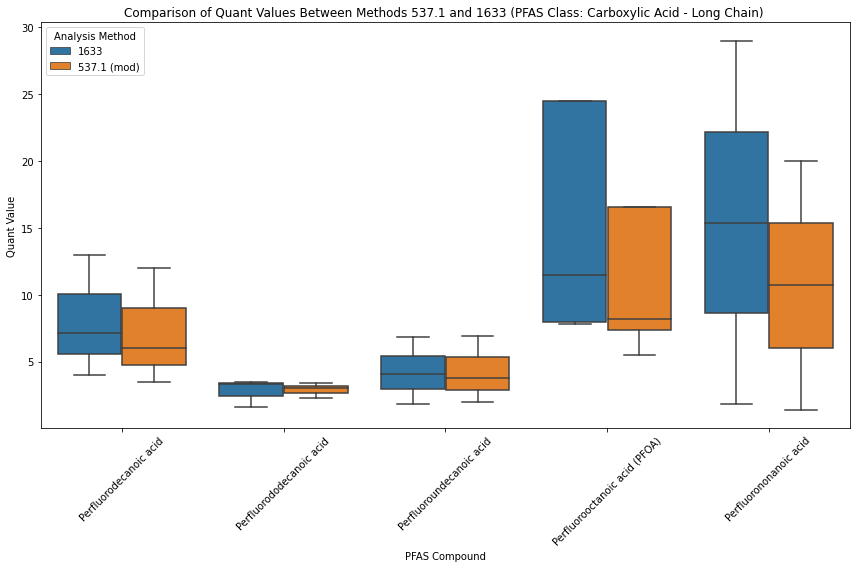

In [37]:
CarboxylicAcid_Long_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Long_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Long Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [38]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Long_df.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorodecanoic acid           6
Perfluorododecanoic acid         6
Perfluorononanoic acid           4
Perfluorooctanoic acid (PFOA)    8
Perfluoroundecanoic acid         6
dtype: int64


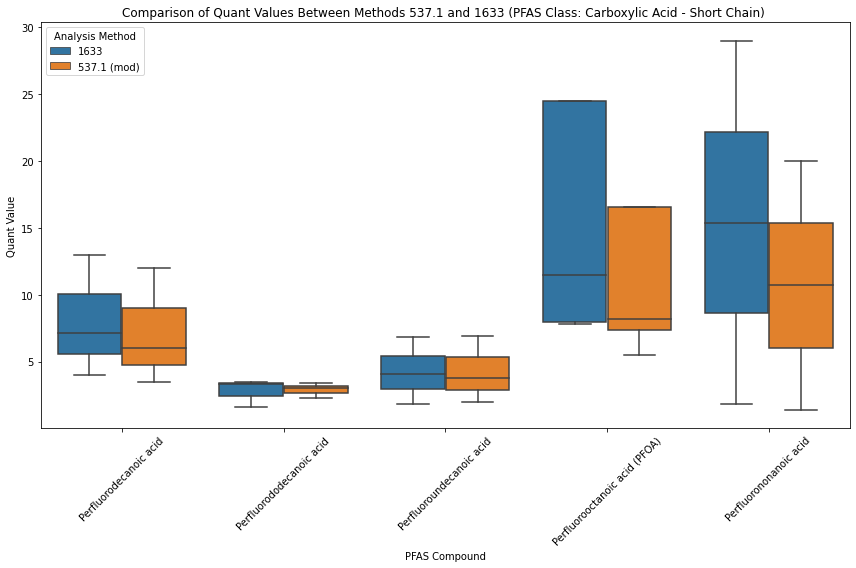

In [39]:
CarboxylicAcid_Short_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=CarboxylicAcid_Short_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Carboxylic Acid - Short Chain) ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [40]:
# Assuming your DataFrame is named df
grouped_counts = CarboxylicAcid_Short_df.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorodecanoic acid           6
Perfluorododecanoic acid         6
Perfluorononanoic acid           4
Perfluorooctanoic acid (PFOA)    8
Perfluoroundecanoic acid         6
dtype: int64


In [41]:
FluorotelomerSulfonicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)]
FluorotelomerSulfonicAcid_df

#temp=FluorotelomerSulfonicAcid_df.groupby('PFAS Compound')
#temp['Quant Only Incl Qual Flags'].describe()

,Result,Analysis Method,Sample Location,Type,Sample Date,PFAS Compound,MDL,Detection Class,Quant Only Incl Qual Flags,Quant Incl Estimates Incl Qual Flags,All (w BDL= MDL/2) Incl Qual Flags,Units,ChainLength,Dominant Contributor,Sector,unique_key


In [42]:
FluorotelomerSulfonicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)]
plt.figure(figsize=(8, 6))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=FluorotelomerSulfonicAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Fluorotelomer Sulfonic Acid ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 576x432 with 0 Axes>

In [43]:
PerPolyfluorotherCarboxylicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)]
PerPolyfluorotherCarboxylicAcid_df

,Result,Analysis Method,Sample Location,Type,Sample Date,PFAS Compound,MDL,Detection Class,Quant Only Incl Qual Flags,Quant Incl Estimates Incl Qual Flags,All (w BDL= MDL/2) Incl Qual Flags,Units,ChainLength,Dominant Contributor,Sector,unique_key


In [44]:
PerPolyfluorotherCarboxylicAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=PerPolyfluorotherCarboxylicAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Fluorotelomer Sulfonic Acid) ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 864x576 with 0 Axes>

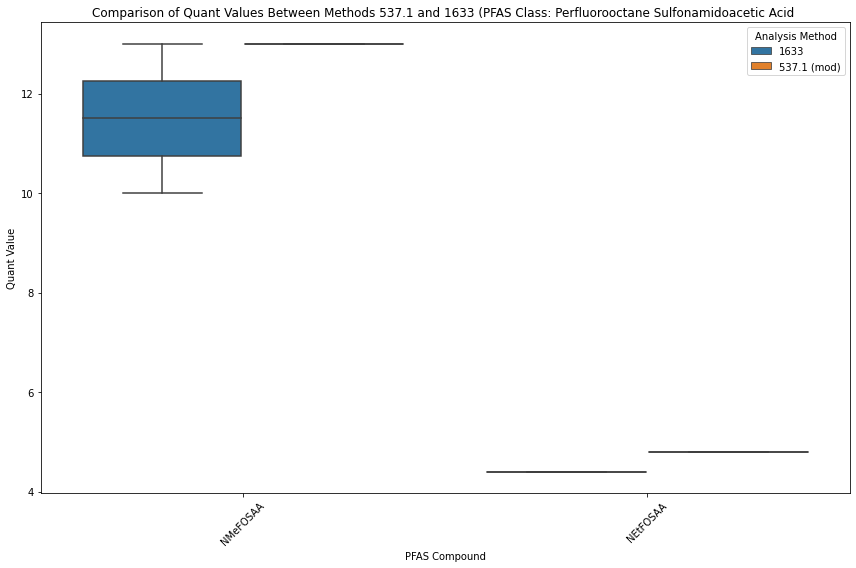

In [45]:
PerfluorooctaneSulfonamidoaceticAcid_df=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamidoaceticAcid_df, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [46]:
# Assuming your DataFrame is named df
grouped_counts = PerfluorooctaneSulfonamidoaceticAcid_df.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
NEtFOSAA    2
NMeFOSAA    4
dtype: int64


In [47]:
all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)]

,Result,Analysis Method,Sample Location,Type,Sample Date,PFAS Compound,MDL,Detection Class,Quant Only Incl Qual Flags,Quant Incl Estimates Incl Qual Flags,All (w BDL= MDL/2) Incl Qual Flags,Units,ChainLength,Dominant Contributor,Sector,unique_key


In [48]:
PerfluorooctaneSulfonamideEthanol=all_df[all_df['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=PerfluorooctaneSulfonamideEthanol, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Perfluorooctane Sulfonamide Ethanol ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 864x576 with 0 Axes>

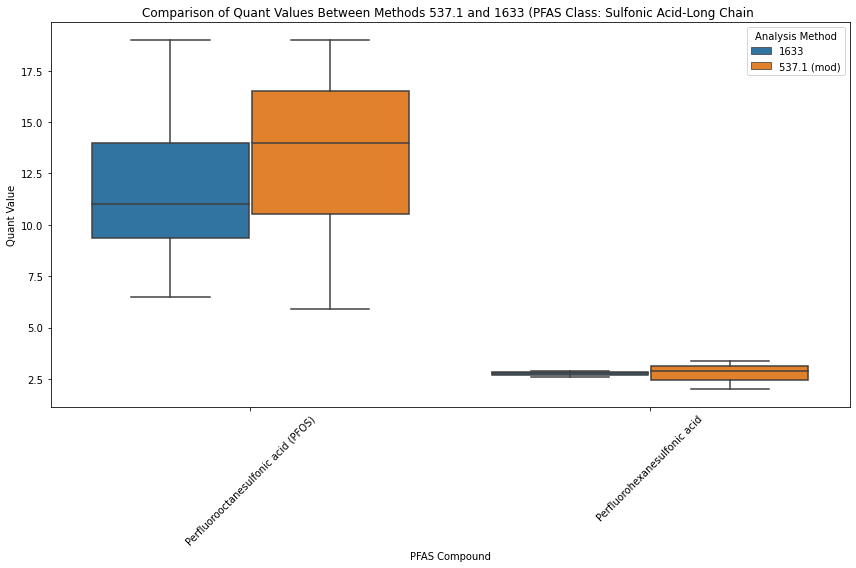

In [49]:
SulfonicAcid_Long=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Long, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Long Chain ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [50]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Long.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorohexanesulfonic acid            6
Perfluorooctanesulfonic acid (PFOS)    14
dtype: int64


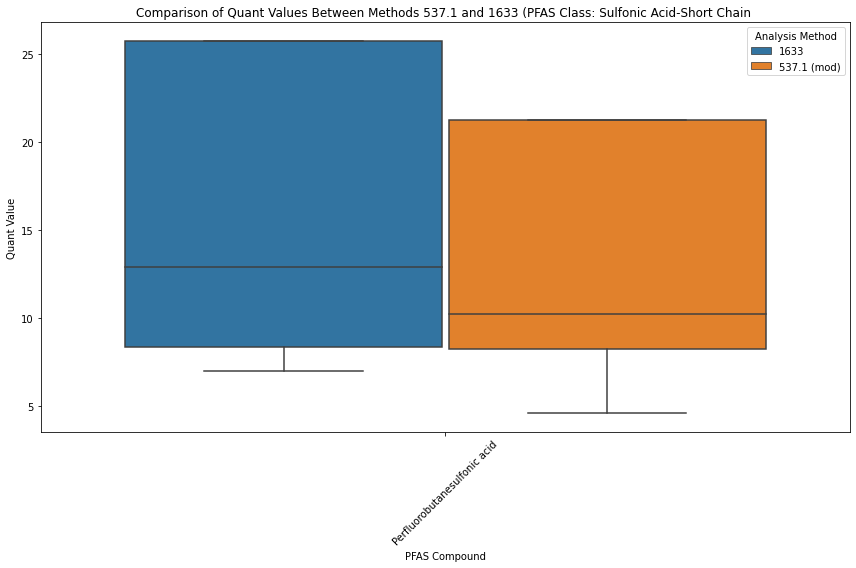

In [51]:
SulfonicAcid_Short=all_df[all_df['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)]
plt.figure(figsize=(12, 8))  # Set the figure size as desired
sns.boxplot(x='PFAS Compound', y='Quant Only Incl Qual Flags', hue='Analysis Method', data=SulfonicAcid_Short, showfliers=False)
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.title('Comparison of Quant Values Between Methods 537.1 and 1633 (PFAS Class: Sulfonic Acid-Short Chain ')
plt.ylabel('Quant Value')
plt.xlabel('PFAS Compound')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [52]:
# Assuming your DataFrame is named df
grouped_counts = SulfonicAcid_Short.groupby('PFAS Compound').size()

# Display the counts for each PFAS Compound
print(grouped_counts)

PFAS Compound
Perfluorobutanesulfonic acid    8
dtype: int64


## 1633 vs 537.1 PFAS Concentration Plots

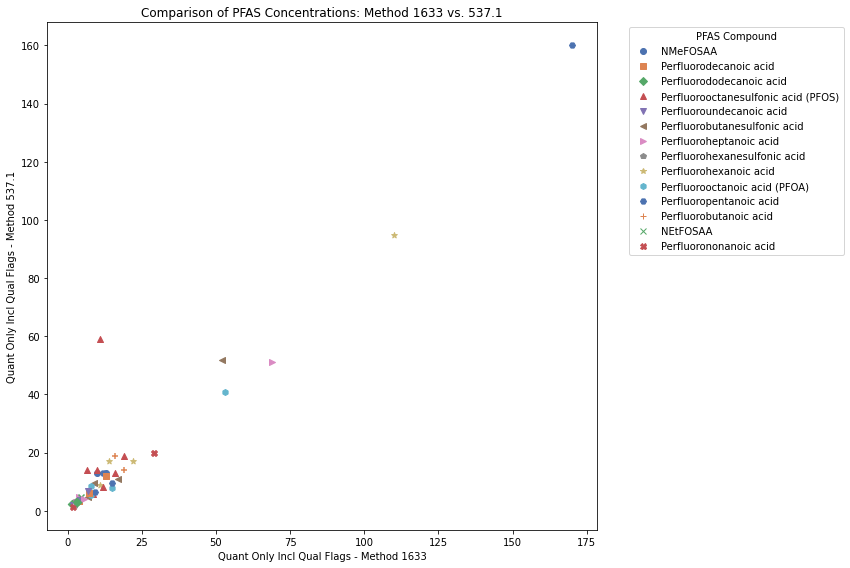

In [53]:
# Example list of markers and colors
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("deep", n_colors=len(quant_df['PFAS Compound_1633'].unique()))

# Get unique PFAS compounds
unique_compounds = quant_df['PFAS Compound_1633'].unique()

# Create a dictionary mapping each compound to a marker and color
compound_style_map = {compound: (marker, color) for compound, marker, color in zip(unique_compounds, itertools.cycle(markers), itertools.cycle(colors))}

plt.figure(figsize=(12, 8))

# Create a legend map to handle duplicate labels
legend_map = {}

# Iterate over DataFrame rows
for _, row in quant_df.iterrows():
    marker, color = compound_style_map[row['PFAS Compound_1633']]
    plt.scatter(row['Quant Only Incl Qual Flags_1633'], row['Quant Only Incl Qual Flags_5371'], 
                marker=marker, color=color, label=row['PFAS Compound_1633'])
    
    # Update legend map
    if row['PFAS Compound_1633'] not in legend_map:
        legend_map[row['PFAS Compound_1633']] = (marker, color)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker=style[0], color=style[1], label=compound, linestyle='None') 
                   for compound, style in legend_map.items()]
plt.legend(handles=legend_elements, title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Comparison of PFAS Concentrations: Method 1633 vs. 537.1')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.tight_layout()
plt.show()


c:\Users\rodriguezc\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


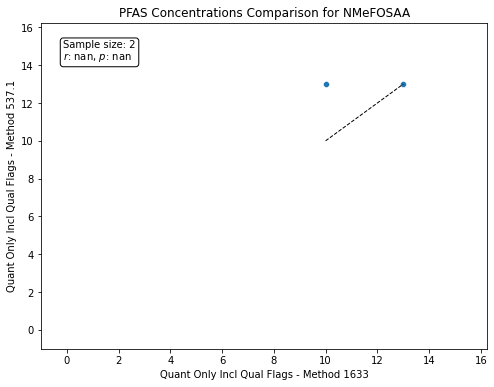

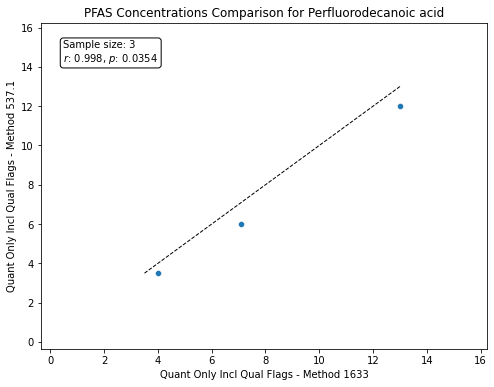

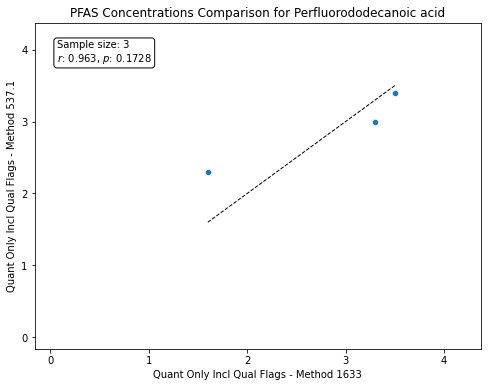

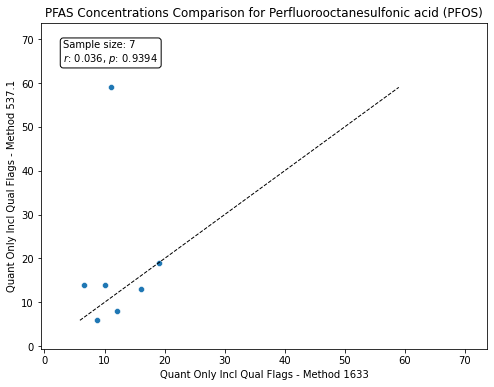

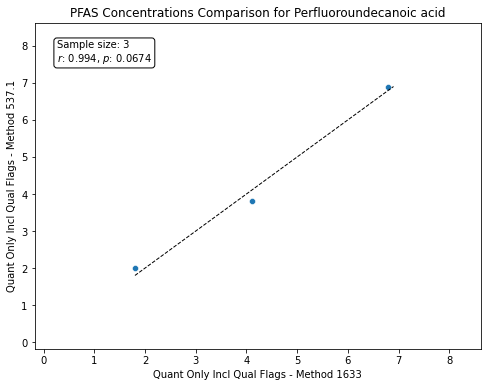

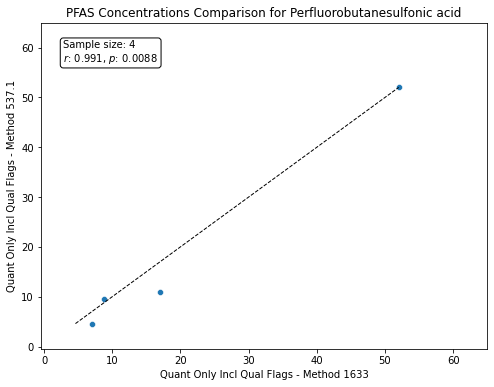

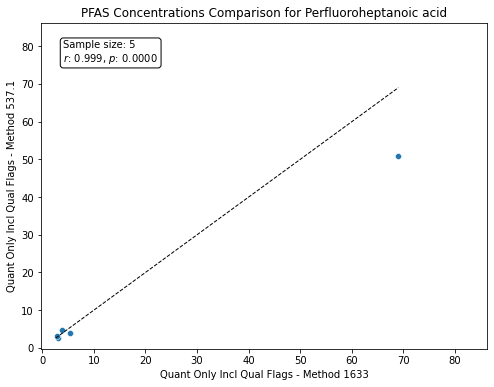

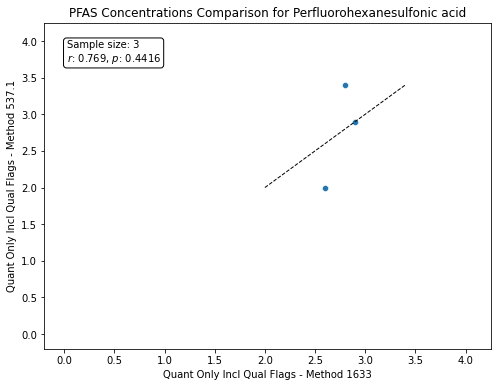

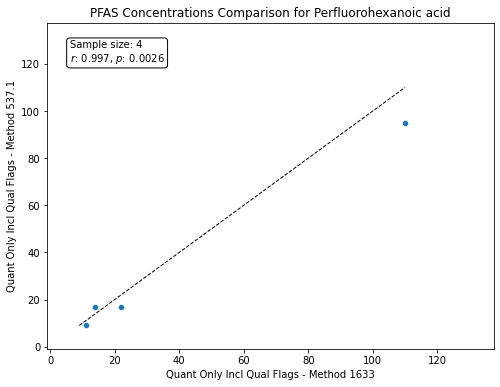

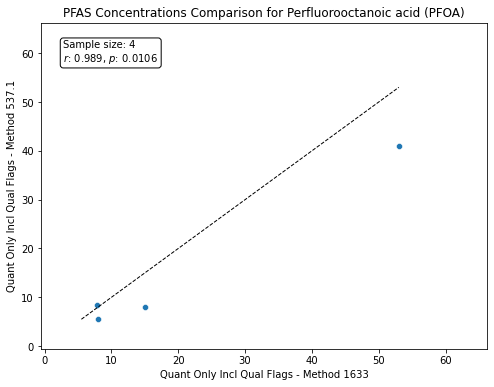

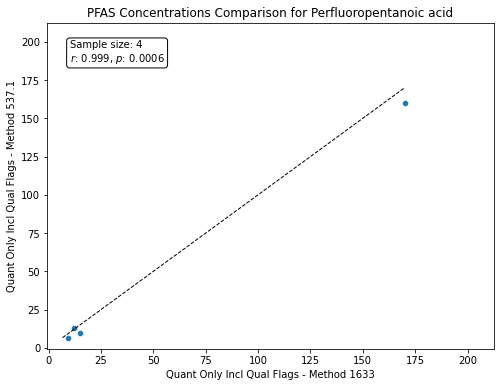

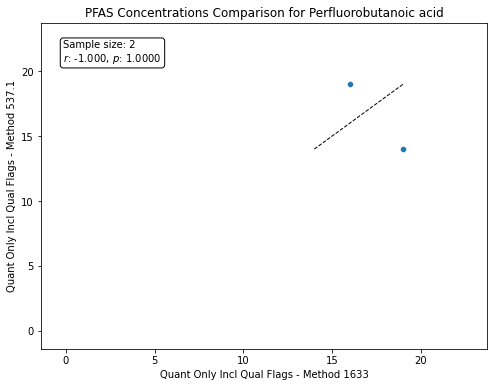

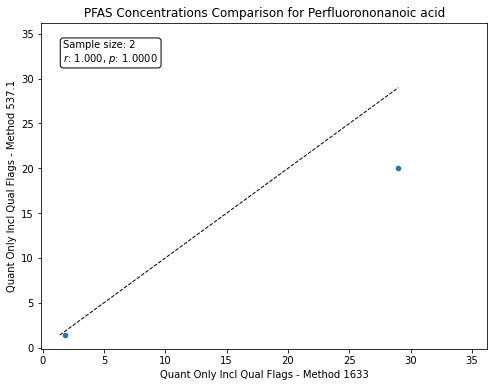

In [55]:
# Get unique PFAS compounds
unique_compounds = quant_df['PFAS Compound_1633'].unique()

# Iterate through each unique compound and create a scatter plot
for compound in unique_compounds:
    # Filter the DataFrame for the current compound
    compound_df = quant_df[quant_df['PFAS Compound_1633'] == compound].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
    
    # Ensure there are at least two data points
    if len(compound_df) >= 2:
        # Calculate local min and max for the current compound's data
        local_min = min(compound_df['Quant Only Incl Qual Flags_1633'].min(), compound_df['Quant Only Incl Qual Flags_5371'].min())
        local_max = max(compound_df['Quant Only Incl Qual Flags_1633'].max(), compound_df['Quant Only Incl Qual Flags_5371'].max())
        
        # Calculate Pearson correlation coefficient and p-value
        r_value, p_value = scipy.stats.pearsonr(compound_df['Quant Only Incl Qual Flags_1633'], compound_df['Quant Only Incl Qual Flags_5371'])
        sample_size = len(compound_df)
        
        # Create the scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=compound_df, x='Quant Only Incl Qual Flags_1633', y='Quant Only Incl Qual Flags_5371')
        
        # Set the same limits for both axes based on local min and max
        plt.xlim(local_min*-.1, local_max*1.25)
        plt.ylim(local_min*-.1, local_max*1.25)
        
        # Adding plot titles and labels
        plt.title(f'PFAS Concentrations Comparison for {compound}')
        plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
        plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
        
        # Adding a diagonal line to indicate where x = y
        plt.plot([local_min, local_max], [local_min, local_max], 'k--', linewidth=1)
        
        # Annotate plot with statistics
        plt.annotate(f'Sample size: {sample_size}\n$r$: {r_value:.3f}, $p$: {p_value:.4f}', 
                    xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
        
        # Show plot
        plt.show()


## Scatter Plots for PFAS Class

In [56]:
def calculate_confidence_interval(r, sample_size, confidence_level=0.95):
    """
    Calculate the confidence interval for a Pearson correlation coefficient using Fisher's z-transformation.
    
    Args:
        r (float): The Pearson correlation coefficient.
        sample_size (int): The number of observations.
        confidence_level (float): The confidence level for the interval.
        
    Returns:
        tuple: The lower and upper bounds of the confidence interval for the correlation coefficient.
    """
    z = np.arctanh(r)
    se = 1 / np.sqrt(sample_size - 3)
    z_critical = scipy.stats.norm.ppf(1 - (1 - confidence_level) / 2)
    z_ci_lower, z_ci_upper = z - z_critical * se, z + z_critical * se
    r_ci_lower, r_ci_upper = np.tanh(z_ci_lower), np.tanh(z_ci_upper)
    
    return r_ci_lower, r_ci_upper


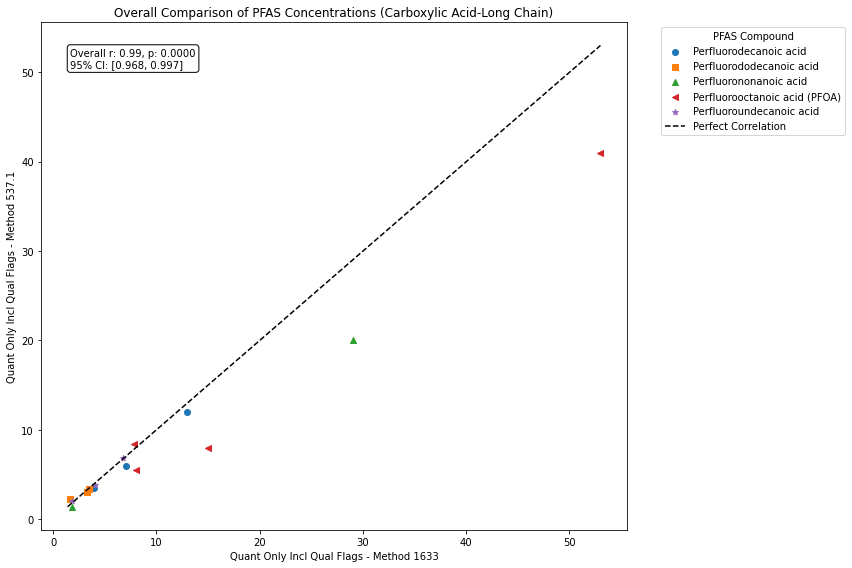

In [69]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_CarboxylicAcid_Long))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_CarboxylicAcid_Long, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Carboxylic Acid-Long Chain)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [70]:
len(filtered_df)

15

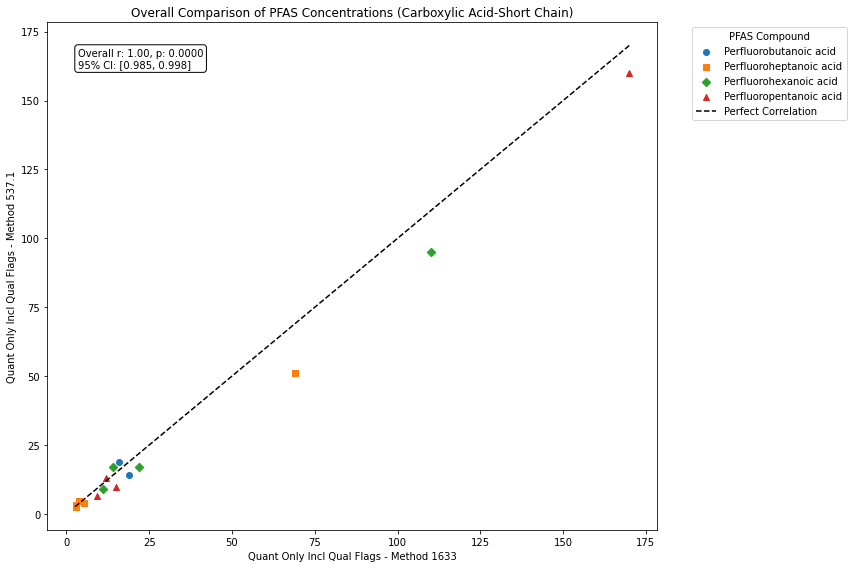

In [71]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_CarboxylicAcid_Short))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_CarboxylicAcid_Short, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Carboxylic Acid-Short Chain)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [72]:
len(filtered_df)

15

In [73]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_FluorotelomerSulfonicAcid))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_FluorotelomerSulfonicAcid, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Fluorotelomer Sulfonic Acid)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: x and y must have length at least 2.

In [74]:
len(filtered_df)

0

In [60]:
filtered_df

,Result_1633,Analysis Method_1633,Sample Location_1633,Type_1633,Sample Date_1633,PFAS Compound_1633,MDL_1633,Detection Class_1633,Quant Only Incl Qual Flags_1633,Quant Incl Estimates Incl Qual Flags_1633,...,PFAS Compound_5371,MDL_5371,Detection Class_5371,Quant Only Incl Qual Flags_5371,Quant Incl Estimates Incl Qual Flags_5371,All (w BDL= MDL/2) Incl Qual Flags_5371,Units_5371,ChainLength_5371,Dominant Contributor_5371,Sector_5371


In [75]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerPolyfluorotherCarboxylicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_PerPolyfluorotherCarboxylicAcid))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_PerPolyfluorotherCarboxylicAcid, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Per-Polyfluorother Carboxylic Acid)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: x and y must have length at least 2.

In [76]:
filtered_df

,Result_1633,Analysis Method_1633,Sample Location_1633,Type_1633,Sample Date_1633,PFAS Compound_1633,MDL_1633,Detection Class_1633,Quant Only Incl Qual Flags_1633,Quant Incl Estimates Incl Qual Flags_1633,...,PFAS Compound_5371,MDL_5371,Detection Class_5371,Quant Only Incl Qual Flags_5371,Quant Incl Estimates Incl Qual Flags_5371,All (w BDL= MDL/2) Incl Qual Flags_5371,Units_5371,ChainLength_5371,Dominant Contributor_5371,Sector_5371


<ipython-input-56-1e6c5671256a>:14: RuntimeWarning: divide by zero encountered in double_scalars
  se = 1 / np.sqrt(sample_size - 3)


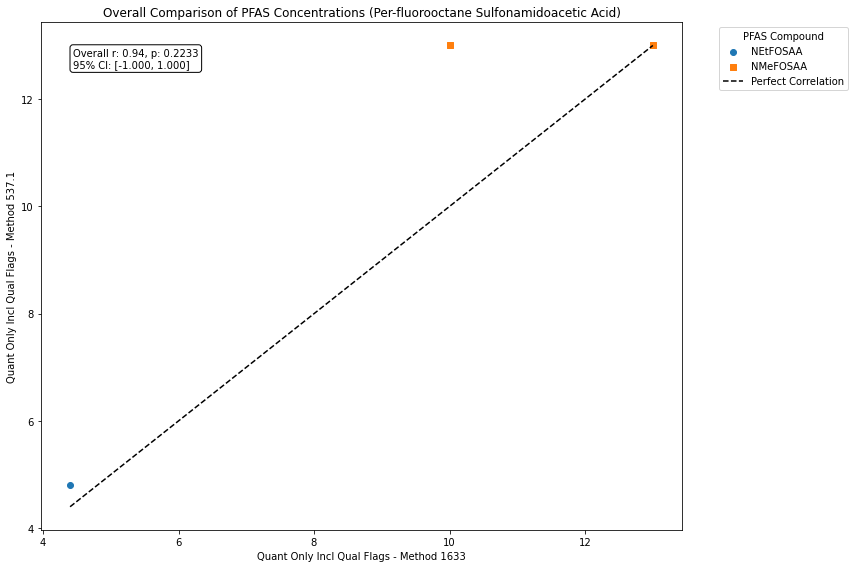

In [77]:

# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Per-fluorooctane Sulfonamidoacetic Acid)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [78]:
len(filtered_df)

3

In [79]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_PerfluorooctaneSulfonamideEthanol))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_PerfluorooctaneSulfonamideEthanol, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Per-fluorooctane Sulfonamide Ethanol)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: x and y must have length at least 2.

In [80]:
len(filtered_df)

0

In [65]:
filtered_df

,Result_1633,Analysis Method_1633,Sample Location_1633,Type_1633,Sample Date_1633,PFAS Compound_1633,MDL_1633,Detection Class_1633,Quant Only Incl Qual Flags_1633,Quant Incl Estimates Incl Qual Flags_1633,...,PFAS Compound_5371,MDL_5371,Detection Class_5371,Quant Only Incl Qual Flags_5371,Quant Incl Estimates Incl Qual Flags_5371,All (w BDL= MDL/2) Incl Qual Flags_5371,Units_5371,ChainLength_5371,Dominant Contributor_5371,Sector_5371


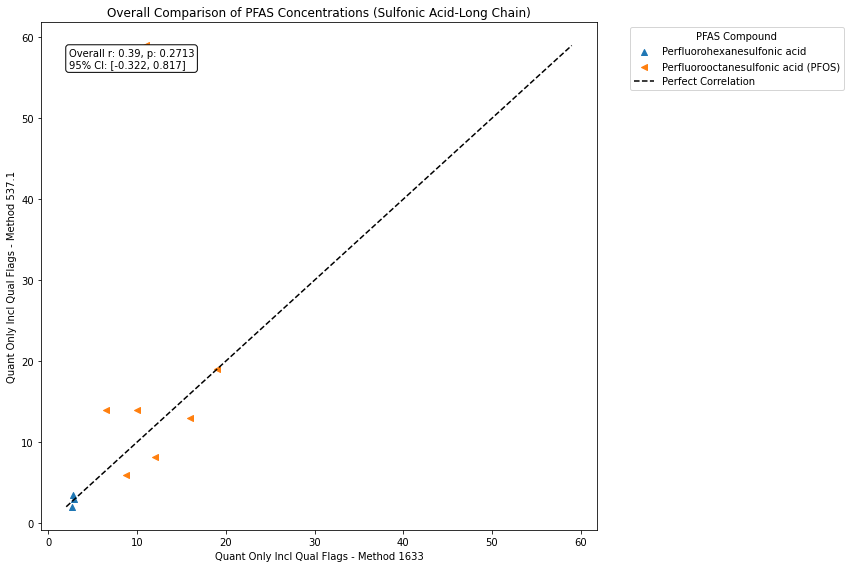

In [81]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_SulfonicAcid_Long))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_SulfonicAcid_Long, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Sulfonic Acid-Long Chain)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [82]:
len(filtered_df)

10

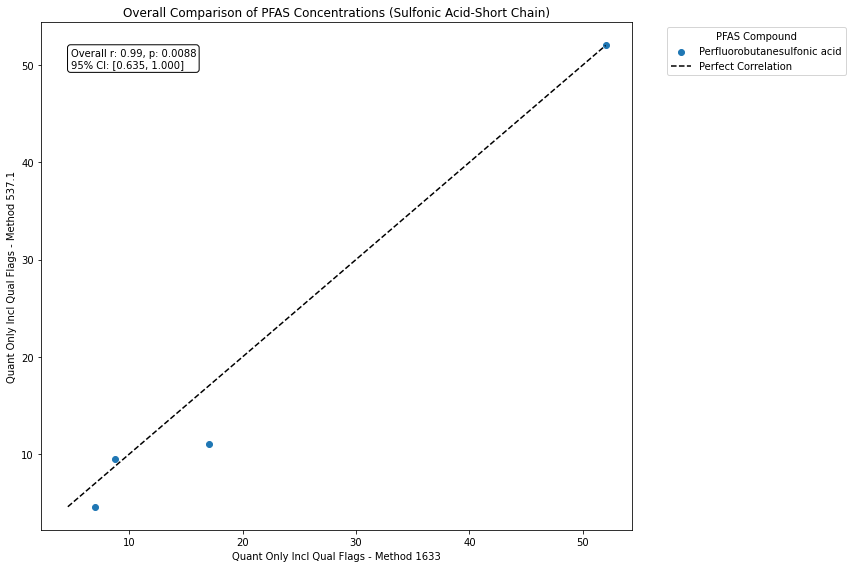

In [84]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate Pearson correlation coefficient and p-value for the filtered dataset
r_value, p_value = scipy.stats.pearsonr(filtered_df['Quant Only Incl Qual Flags_1633'], filtered_df['Quant Only Incl Qual Flags_5371'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_lower, ci_upper = calculate_confidence_interval(r_value, len(filtered_df))

# Define markers and a color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
colors = sns.color_palette("hsv", n_colors=len(pfas_compounds_SulfonicAcid_Short))

# Create a mapping for compounds to markers
compound_marker_map = {compound: marker for compound, marker in zip(pfas_compounds_SulfonicAcid_Short, markers)}

plt.figure(figsize=(12, 8))

# Plot each compound with its assigned marker
for compound, group_data in filtered_df.groupby('PFAS Compound_1633'):
    plt.scatter(group_data['Quant Only Incl Qual Flags_1633'], group_data['Quant Only Incl Qual Flags_5371'], 
                marker=compound_marker_map[compound], label=compound)

# Calculate the overall min and max values for both variables to ensure the line covers the entire data range
overall_min = min(filtered_df['Quant Only Incl Qual Flags_1633'].min(), filtered_df['Quant Only Incl Qual Flags_5371'].min())
overall_max = max(filtered_df['Quant Only Incl Qual Flags_1633'].max(), filtered_df['Quant Only Incl Qual Flags_5371'].max())

# Add a dashed diagonal line to indicate perfect correlation
plt.plot([overall_min, overall_max], [overall_min, overall_max], 'k--', label='Perfect Correlation')

# Annotate the plot with the overall r-value, p-value, and confidence interval
plt.annotate(f'Overall r: {r_value:.2f}, p: {p_value:.4f}\n95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]', 
             xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', 
             bbox=dict(boxstyle='round', fc='w'))

plt.title('Overall Comparison of PFAS Concentrations (Sulfonic Acid-Short Chain)')
plt.xlabel('Quant Only Incl Qual Flags - Method 1633')
plt.ylabel('Quant Only Incl Qual Flags - Method 537.1')
plt.legend(title='PFAS Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [85]:
len(filtered_df)

4

In [68]:
quant_df['PFAS Compound_1633'].unique()

array(['NMeFOSAA', 'Perfluorodecanoic acid', 'Perfluorododecanoic acid',
       'Perfluorooctanesulfonic acid (PFOS)', 'Perfluoroundecanoic acid',
       'Perfluorobutanesulfonic acid', 'Perfluoroheptanoic acid',
       'Perfluorohexanesulfonic acid', 'Perfluorohexanoic acid',
       'Perfluorooctanoic acid (PFOA)', 'Perfluoropentanoic acid',
       'Perfluorobutanoic acid', 'NEtFOSAA', 'Perfluorononanoic acid'],
      dtype=object)

## Bland-Altman plot

### All Quant

<Figure size 720x576 with 0 Axes>

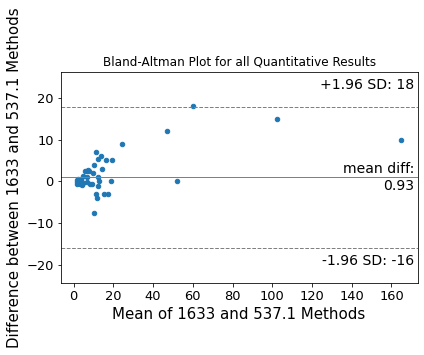

In [96]:
# Extract the two methods' measurements from the dataframe
method1 = quant_df['Quant Only Incl Qual Flags_1633']
method2 = quant_df['Quant Only Incl Qual Flags_5371']

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot
    plt.figure(figsize=(10, 8))
    mean_diff_plot(method1, method2)
    plt.title(f'Bland-Altman Plot for all Quantitative Results')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Difference between 1633 and 537.1 Methods')
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough data for {compound} to generate a Bland-Altman plot.")

### By PFAS Compound

Not enough data for NEtFOSAA to generate a Bland-Altman plot.


<Figure size 720x576 with 0 Axes>

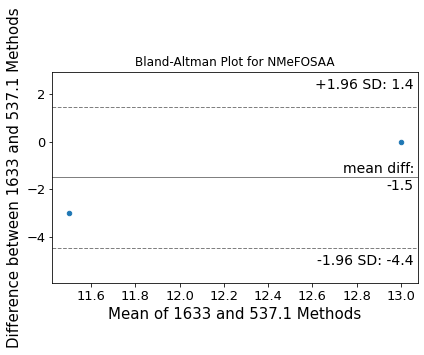

<Figure size 720x576 with 0 Axes>

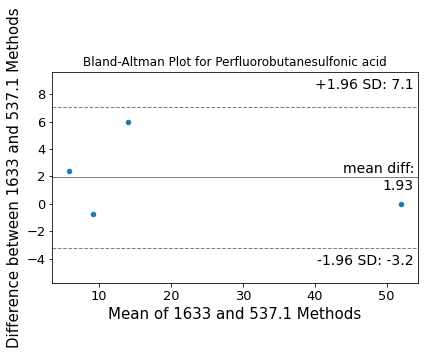

<Figure size 720x576 with 0 Axes>

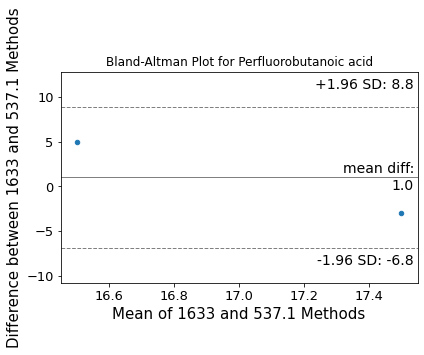

<Figure size 720x576 with 0 Axes>

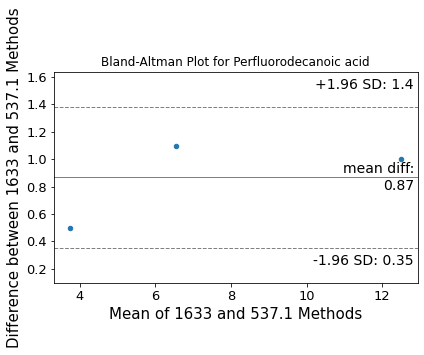

<Figure size 720x576 with 0 Axes>

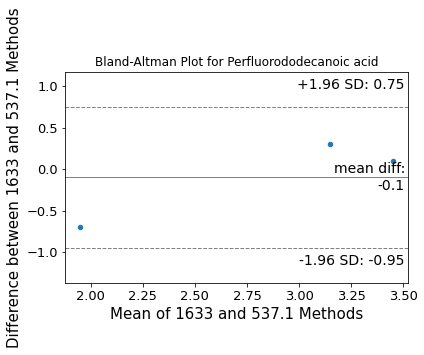

<Figure size 720x576 with 0 Axes>

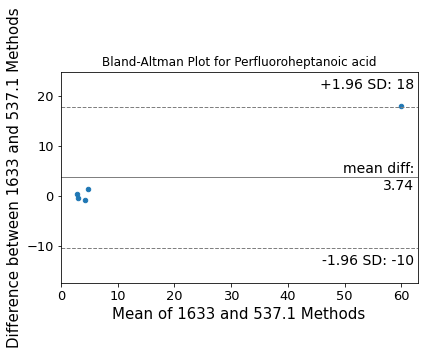

<Figure size 720x576 with 0 Axes>

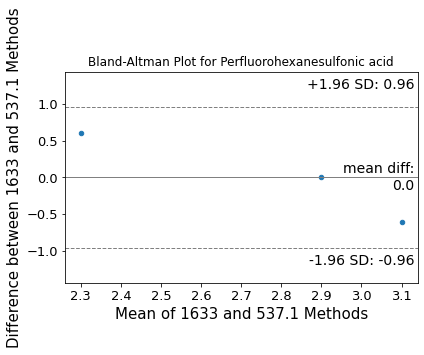

<Figure size 720x576 with 0 Axes>

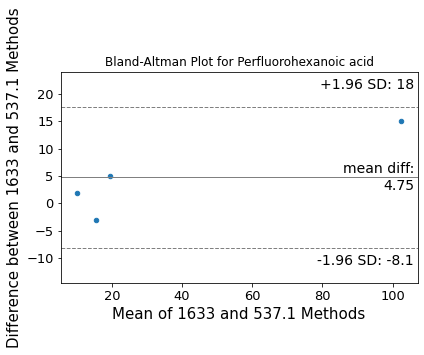

<Figure size 720x576 with 0 Axes>

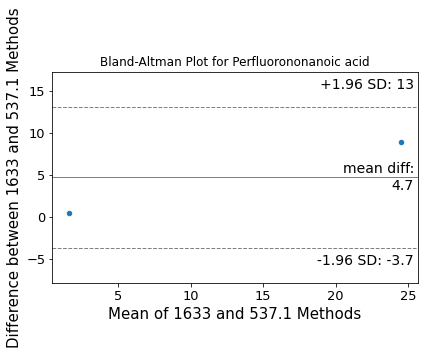

<Figure size 720x576 with 0 Axes>

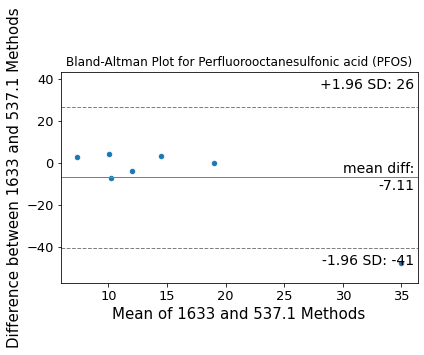

<Figure size 720x576 with 0 Axes>

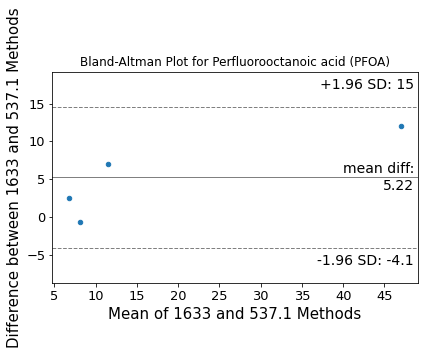

<Figure size 720x576 with 0 Axes>

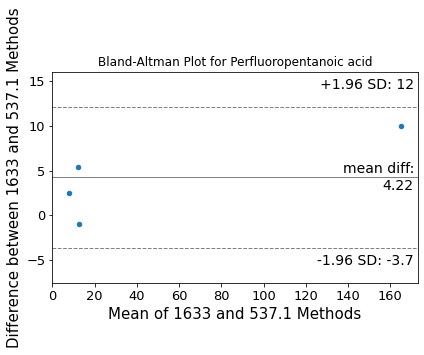

<Figure size 720x576 with 0 Axes>

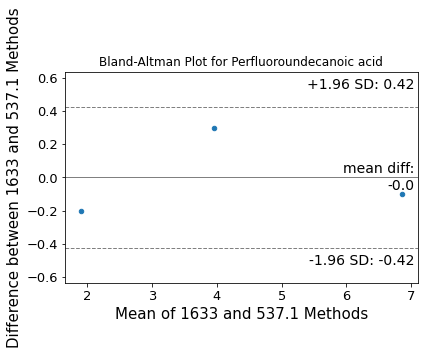

In [89]:
# Assuming quant_df is your DataFrame
groups = quant_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    # Extract the two methods' measurements for the current group
    method1 = group['Quant Only Incl Qual Flags_1633']
    method2 = group['Quant Only Incl Qual Flags_5371']
    
    # Check if there are enough data points for a meaningful plot
    if len(method1) > 1:
        # Generate the Bland-Altman plot
        plt.figure(figsize=(10, 8))
        mean_diff_plot(method1, method2)
        plt.title(f'Bland-Altman Plot for {compound}')
        plt.xlabel('Mean of 1633 and 537.1 Methods')
        plt.ylabel('Difference between 1633 and 537.1 Methods')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {compound} to generate a Bland-Altman plot.")


### By PFAS Class

<Figure size 720x576 with 0 Axes>

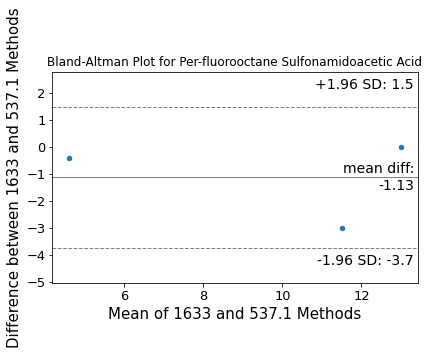

In [106]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot
    plt.figure(figsize=(10, 8))
    mean_diff_plot(method1, method2)
    plt.title(f'Bland-Altman Plot for Per-fluorooctane Sulfonamidoacetic Acid')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Difference between 1633 and 537.1 Methods')
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough data for {compound} to generate a Bland-Altman plot.")


<Figure size 720x576 with 0 Axes>

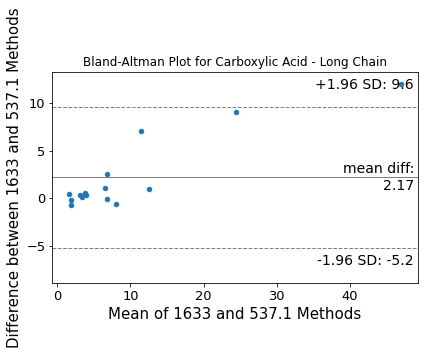

In [108]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot
    plt.figure(figsize=(10, 8))
    mean_diff_plot(method1, method2)
    plt.title(f'Bland-Altman Plot for Carboxylic Acid - Long Chain')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Difference between 1633 and 537.1 Methods')
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough data for {compound} to generate a Bland-Altman plot.")


<Figure size 720x576 with 0 Axes>

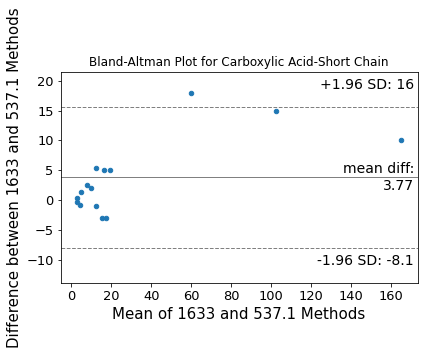

In [91]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot
    plt.figure(figsize=(10, 8))
    mean_diff_plot(method1, method2)
    plt.title(f'Bland-Altman Plot for Carboxylic Acid-Short Chain')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Difference between 1633 and 537.1 Methods')
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough data for {compound} to generate a Bland-Altman plot.")

In [92]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot
    plt.figure(figsize=(10, 8))
    mean_diff_plot(method1, method2)
    plt.title(f'Bland-Altman Plot for Fluorotelomer Sulfonic Acid')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Difference between 1633 and 537.1 Methods')
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough data for {compound} to generate a Bland-Altman plot.")

Not enough data for Perfluoroundecanoic acid to generate a Bland-Altman plot.


<Figure size 720x576 with 0 Axes>

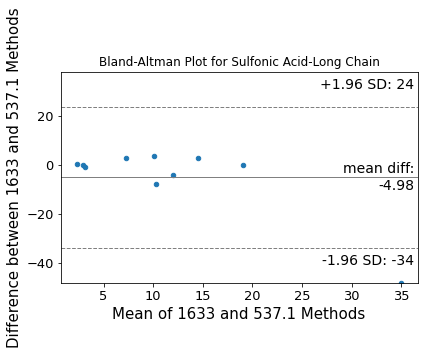

In [94]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot
    plt.figure(figsize=(10, 8))
    mean_diff_plot(method1, method2)
    plt.title(f'Bland-Altman Plot for Sulfonic Acid-Long Chain')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Difference between 1633 and 537.1 Methods')
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough data for {compound} to generate a Bland-Altman plot.")

<Figure size 720x576 with 0 Axes>

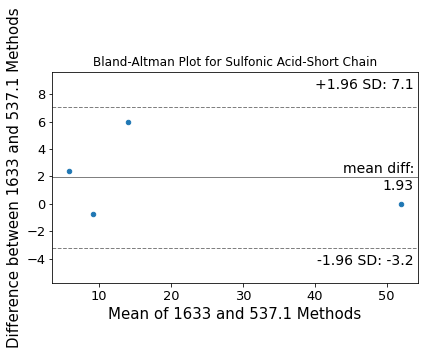

In [95]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Extract the two methods' measurements from the dataframe
method1 = filtered_df['Quant Only Incl Qual Flags_1633']
method2 = filtered_df['Quant Only Incl Qual Flags_5371']

# Check if there are enough data points for a meaningful plot
if len(method1) > 1:
    # Generate the Bland-Altman plot
    plt.figure(figsize=(10, 8))
    mean_diff_plot(method1, method2)
    plt.title(f'Bland-Altman Plot for Sulfonic Acid-Short Chain')
    plt.xlabel('Mean of 1633 and 537.1 Methods')
    plt.ylabel('Difference between 1633 and 537.1 Methods')
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough data for {compound} to generate a Bland-Altman plot.")

## Histograms

In [99]:
quant_df.columns

Index(['Result_1633', 'Analysis Method_1633', 'Sample Location_1633',
       'Type_1633', 'Sample Date_1633', 'PFAS Compound_1633', 'MDL_1633',
       'Detection Class_1633', 'Quant Only Incl Qual Flags_1633',
       'Quant Incl Estimates Incl Qual Flags_1633',
       'All (w BDL= MDL/2) Incl Qual Flags_1633', 'Units_1633',
       'ChainLength_1633', 'Dominant Contributor_1633', 'Sector_1633',
       'unique_key', 'Result_5371', 'Analysis Method_5371',
       'Sample Location_5371', 'Type_5371', 'Sample Date_5371',
       'PFAS Compound_5371', 'MDL_5371', 'Detection Class_5371',
       'Quant Only Incl Qual Flags_5371',
       'Quant Incl Estimates Incl Qual Flags_5371',
       'All (w BDL= MDL/2) Incl Qual Flags_5371', 'Units_5371',
       'ChainLength_5371', 'Dominant Contributor_5371', 'Sector_5371'],
      dtype='object')

### All Quant

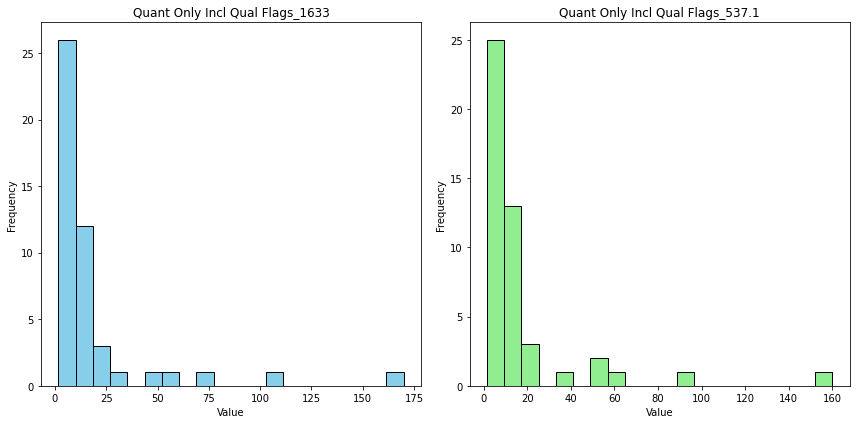

In [100]:
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(quant_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(quant_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()


### By PFAS Compound

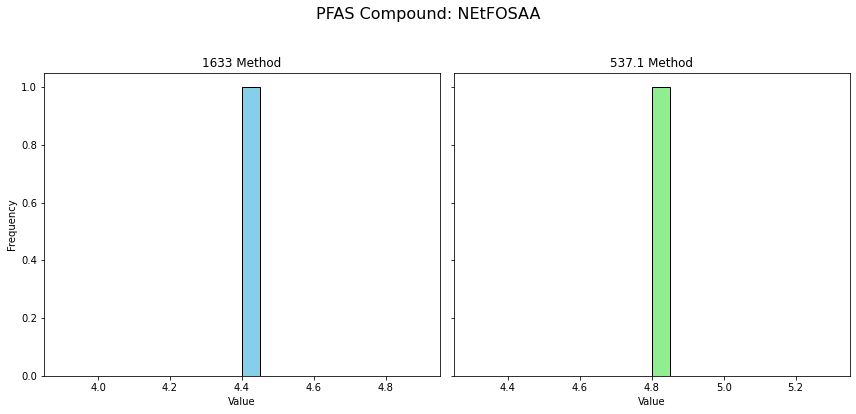

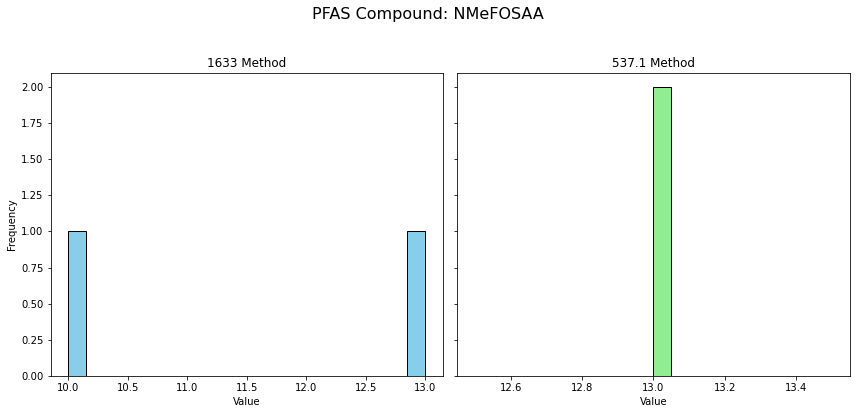

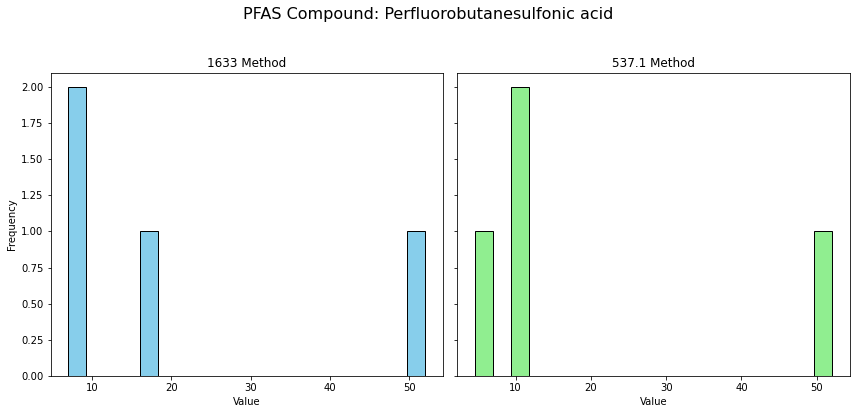

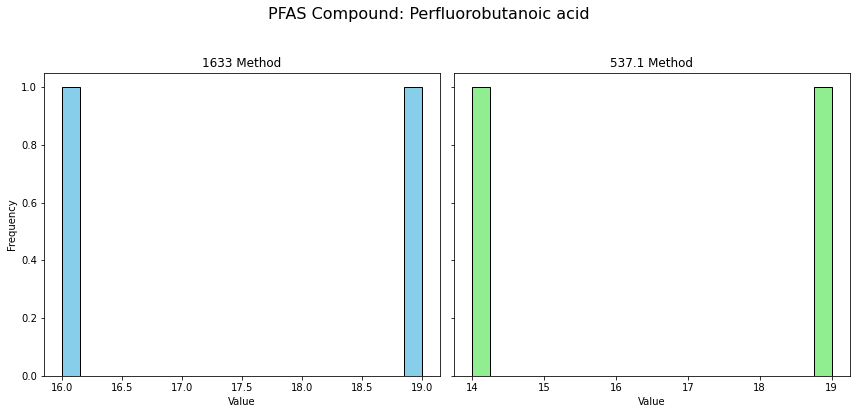

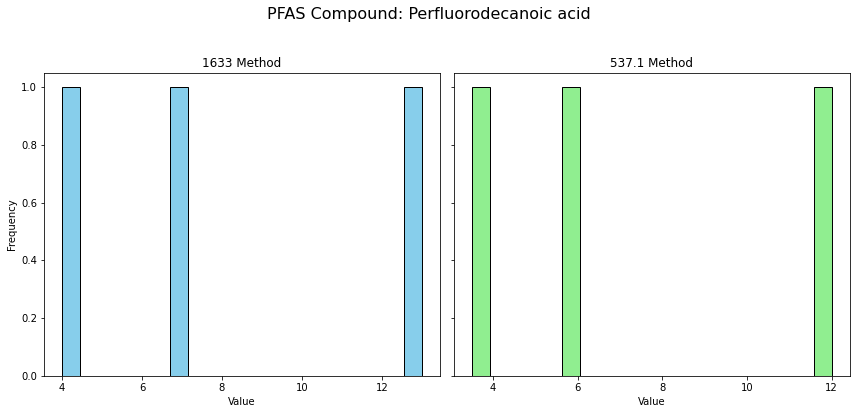

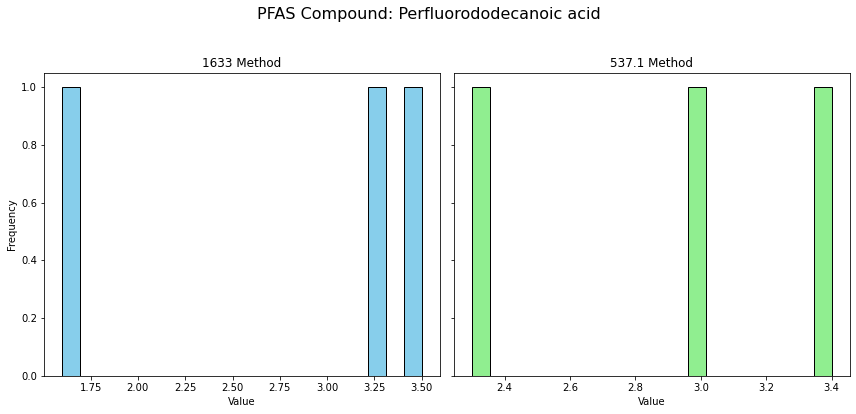

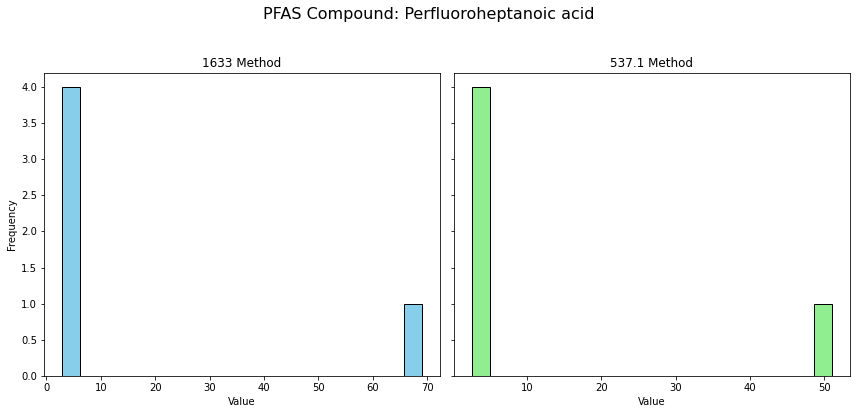

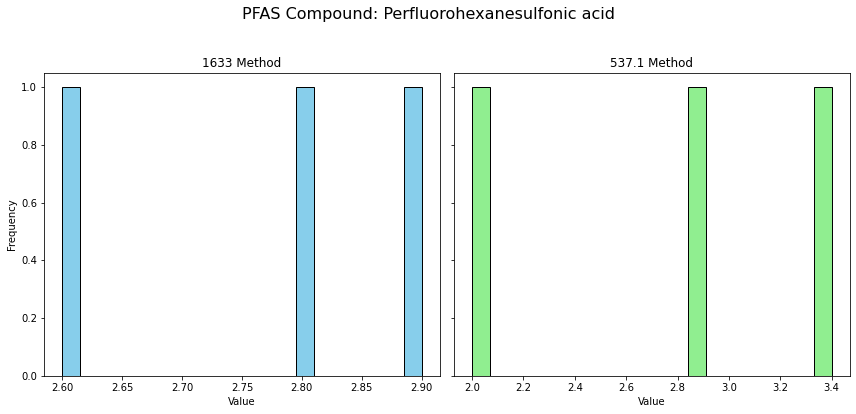

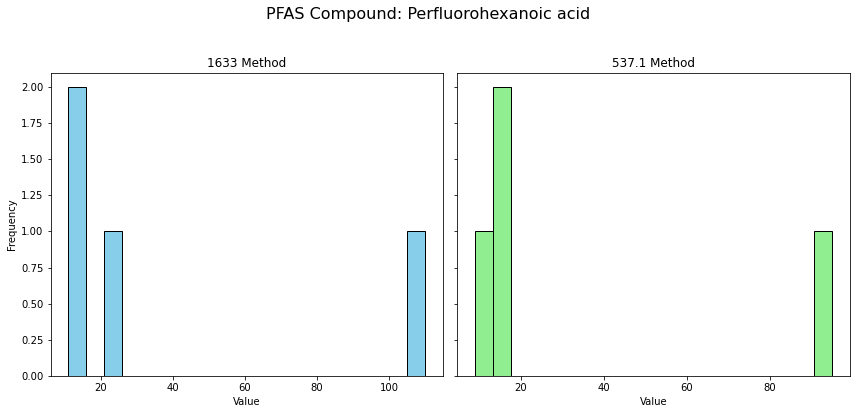

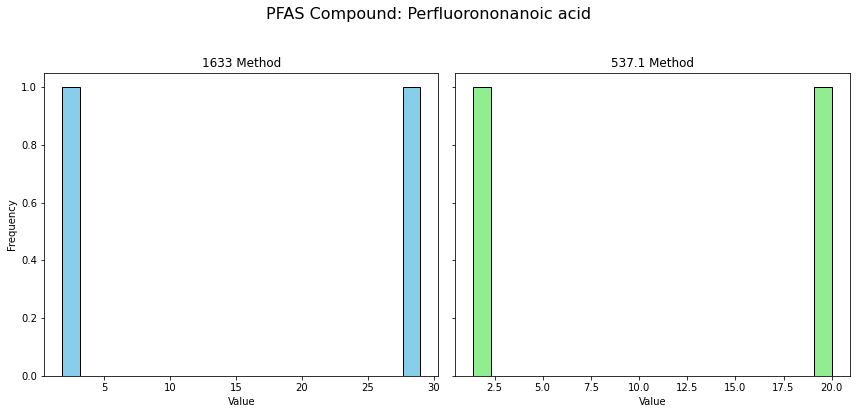

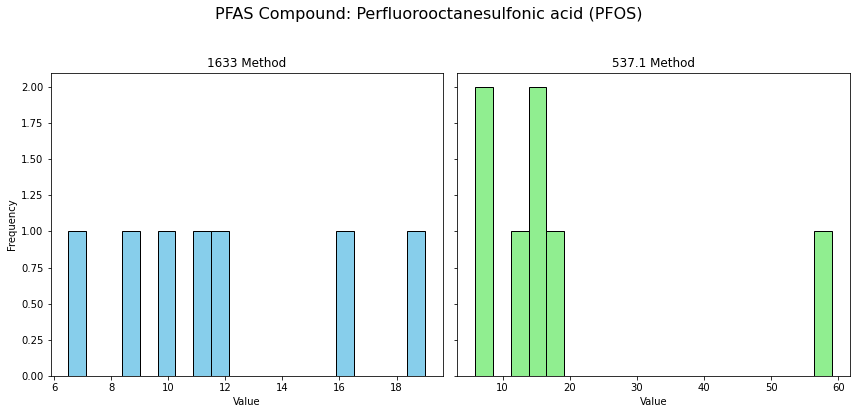

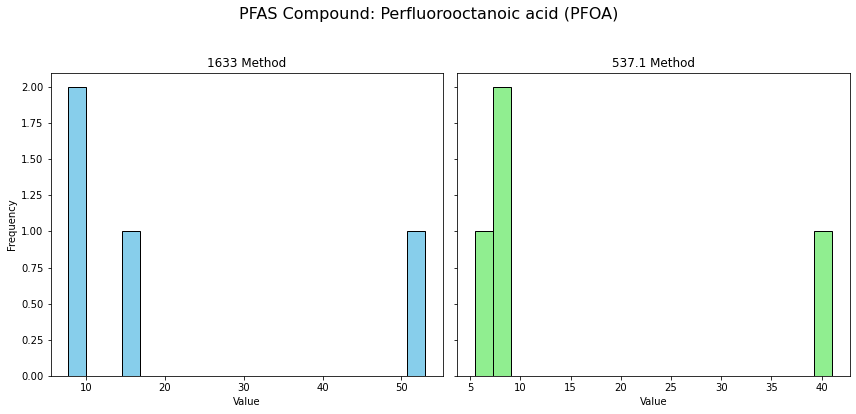

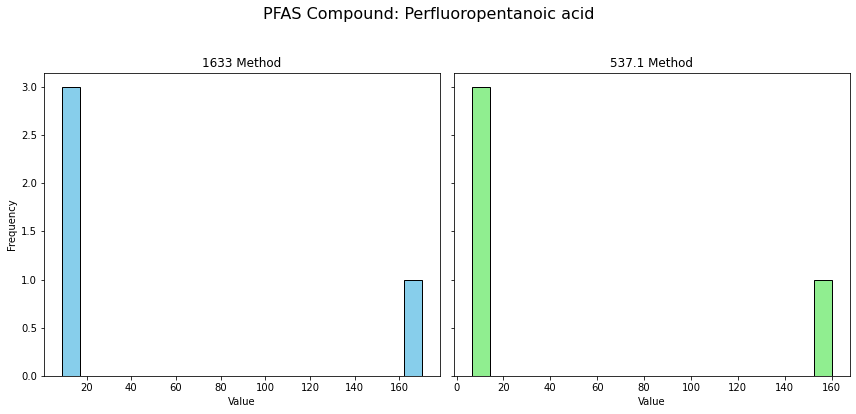

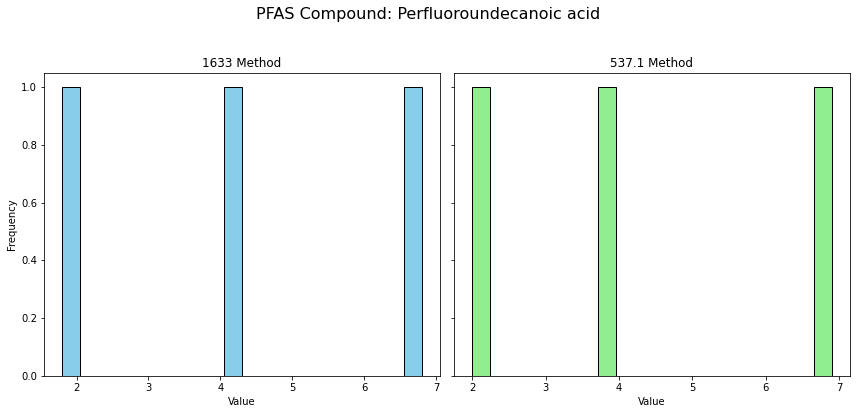

In [101]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = quant_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
    fig.suptitle(f'PFAS Compound: {compound}', fontsize=16)
    
    # Histogram for 'Quant Only Incl Qual Flags_1633'
    axes[0].hist(group['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('1633 Method')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')
    
    # Histogram for 'Quant Only Incl Qual Flags_537.1'
    # Ensure the column name matches exactly, including spaces and punctuation.
    axes[1].hist(group['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
    axes[1].set_title('537.1 Method')
    axes[1].set_xlabel('Value')
    # The Y-axis label is shared, set by the first histogram
    
    # Adjust layout for better spacing and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
    plt.show()


### By PFAS Compound Class

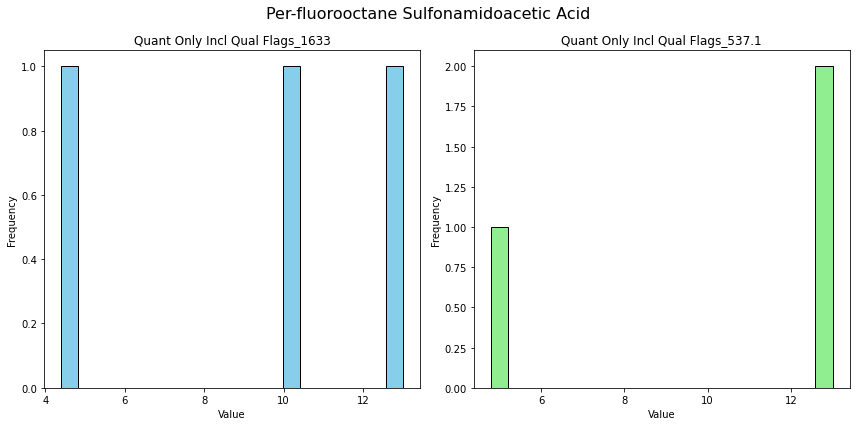

In [103]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Per-fluorooctane Sulfonamidoacetic Acid', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

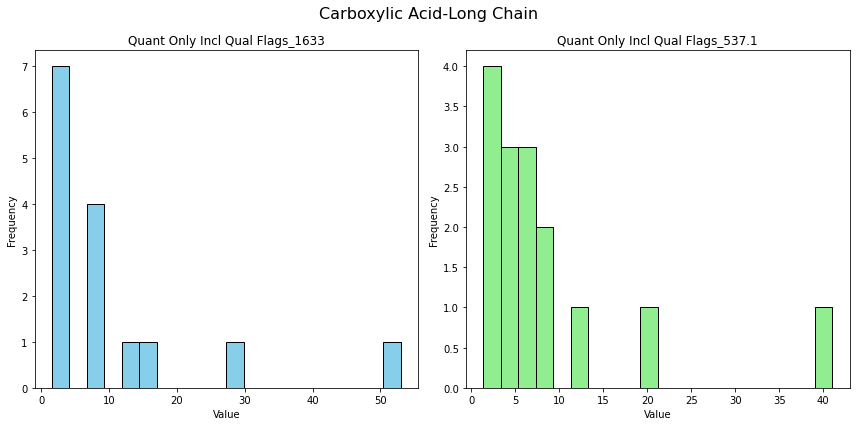

In [109]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Carboxylic Acid-Long Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

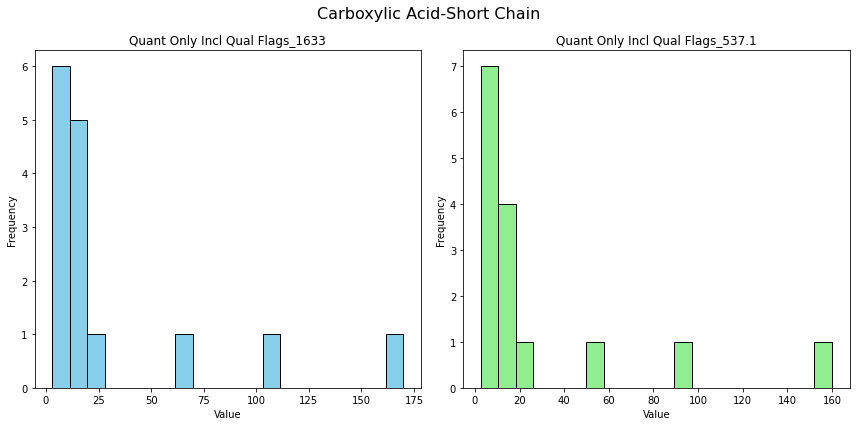

In [110]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Carboxylic Acid-Short Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

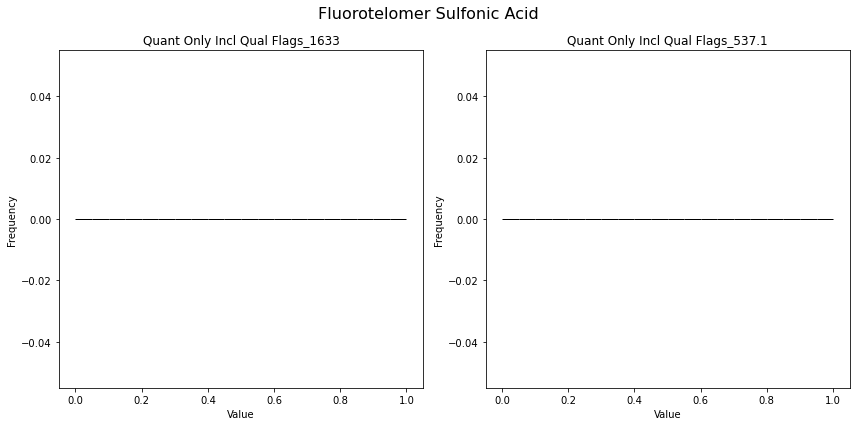

In [111]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Fluorotelomer Sulfonic Acid', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

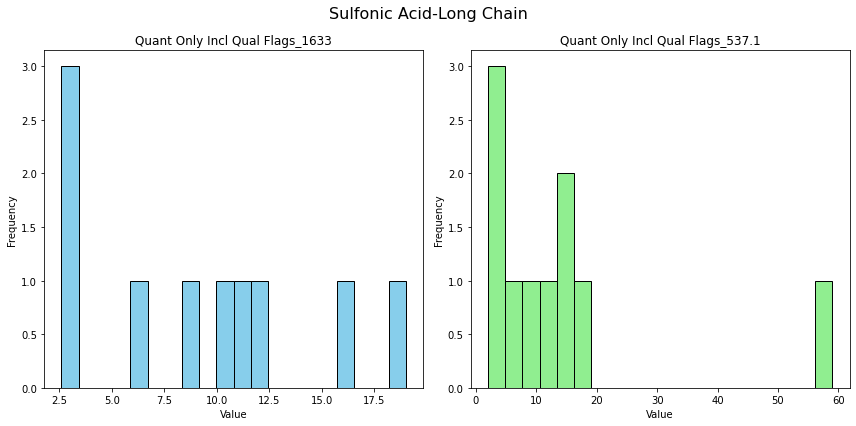

In [112]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Sulfonic Acid-Long Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

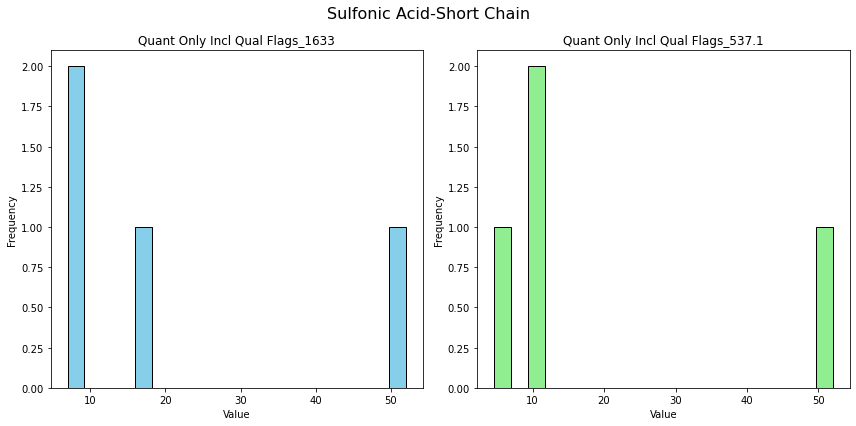

In [113]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Set up the matplotlib figure and axes for side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Sulfonic Acid-Short Chain', fontsize=16)

# Histogram for 'Quant Only Incl Qual Flags_1633'
axes[0].hist(filtered_df['Quant Only Incl Qual Flags_1633'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Quant Only Incl Qual Flags_1633')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram for 'Quant Only Incl Qual Flags_537.1'
# Note: Ensure the column name matches exactly, including spaces and punctuation.
axes[1].hist(filtered_df['Quant Only Incl Qual Flags_5371'].dropna(), bins=20, color='lightgreen', edgecolor='black')  # Adjust column name if necessary
axes[1].set_title('Quant Only Incl Qual Flags_537.1')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Display the histograms
plt.show()

## Histogram for Differences

### All quant

In [116]:
quant_df['Diff_1633-5371']=quant_df['Quant Only Incl Qual Flags_1633']-quant_df['Quant Only Incl Qual Flags_5371']


<ipython-input-116-deb9c023132b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_df['Diff_1633-5371']=quant_df['Quant Only Incl Qual Flags_1633']-quant_df['Quant Only Incl Qual Flags_5371']


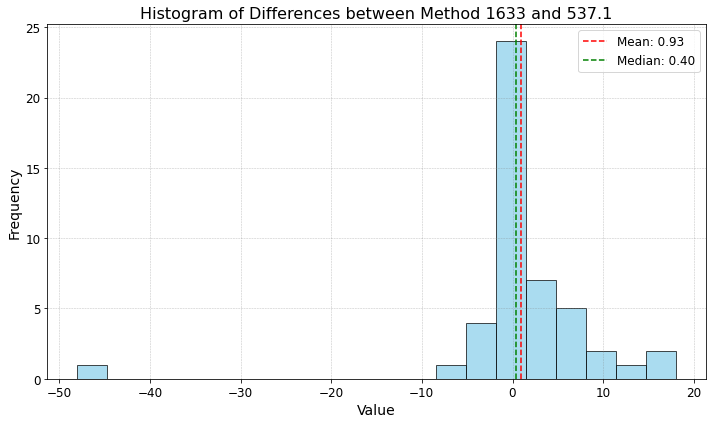

In [122]:
# Step 1: Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(quant_df['Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Differences between Method 1633 and 537.1', fontsize=16)  # Title of the histogram
plt.xlabel('Value', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median
mean_val = np.mean(quant_df['Diff_1633-5371'])
median_val = np.median(quant_df['Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

### By PFAS Compound

Not enough data for NEtFOSAA to generate a histogram.


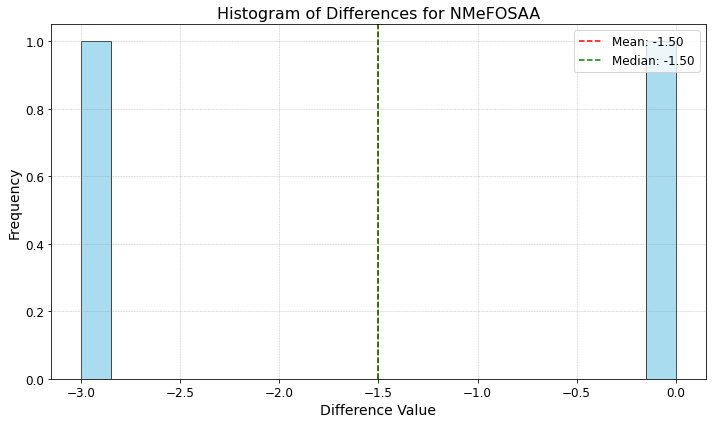

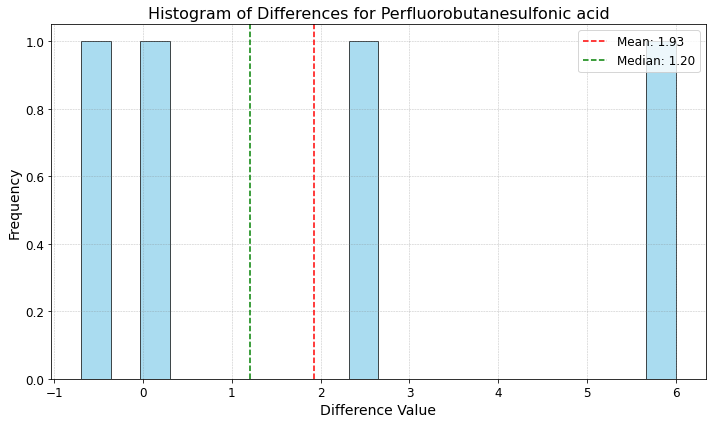

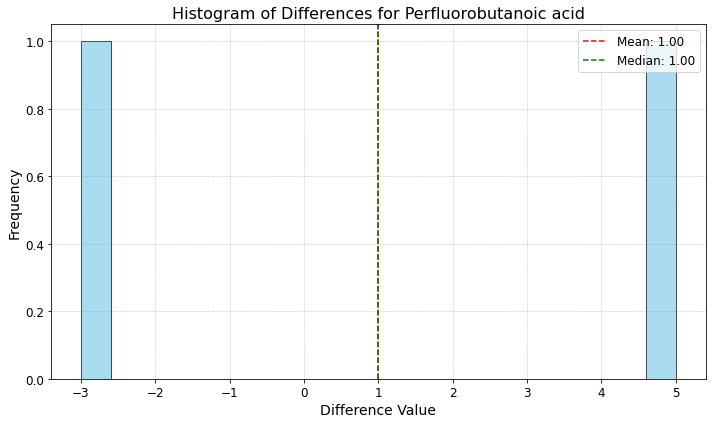

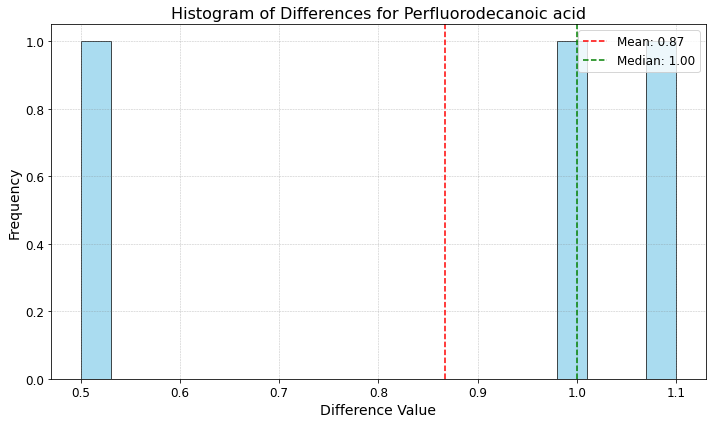

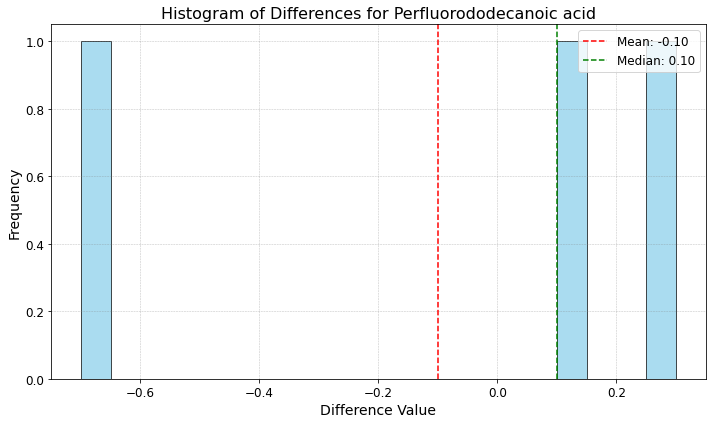

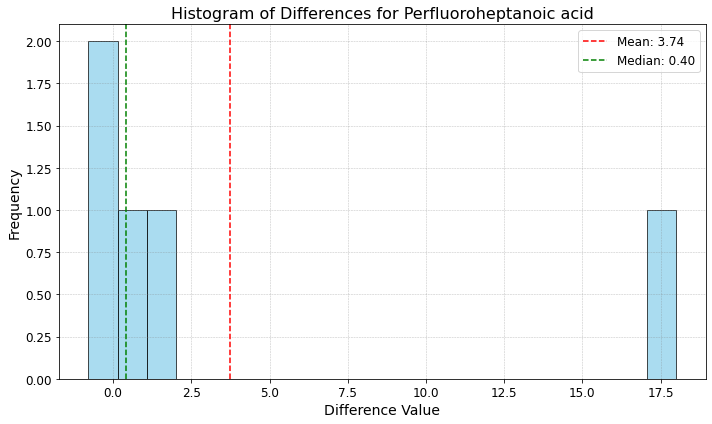

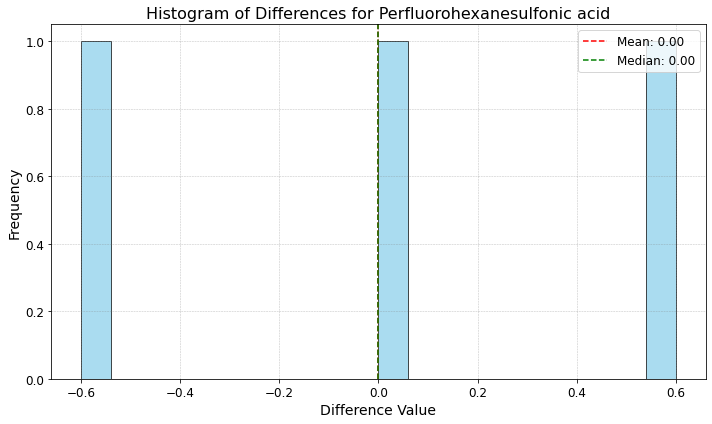

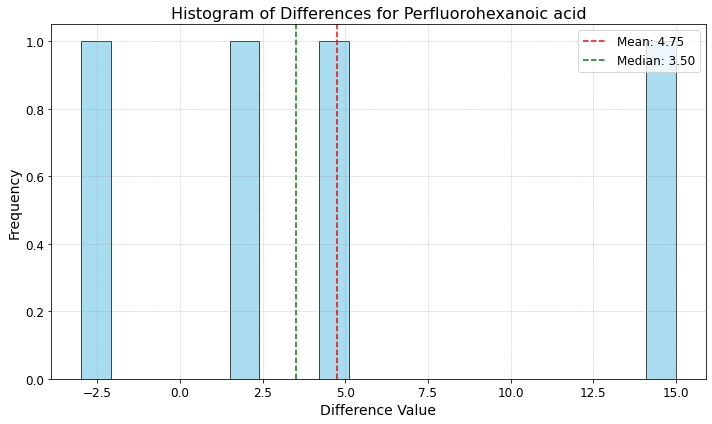

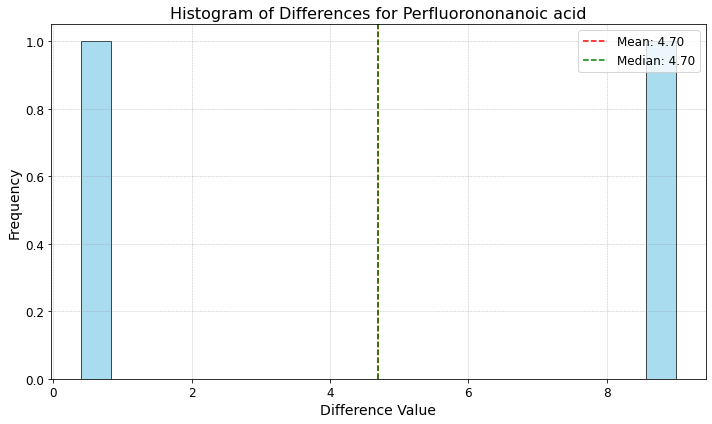

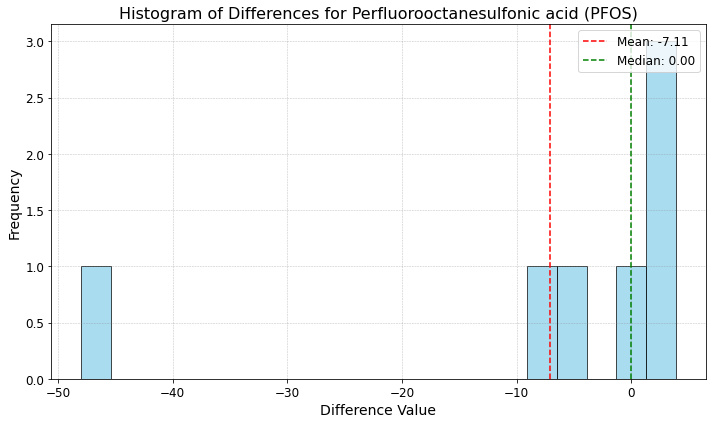

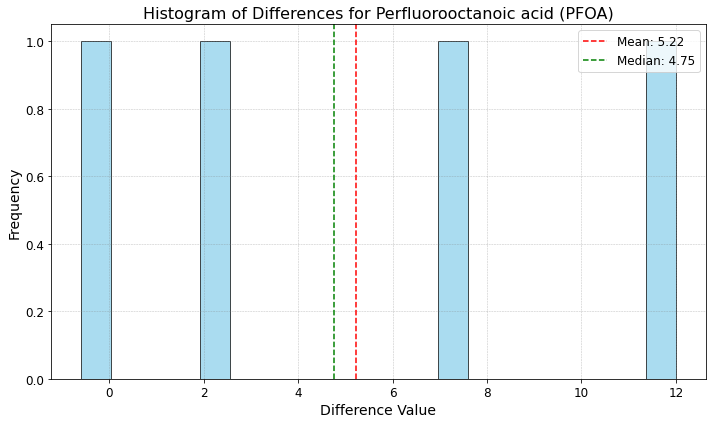

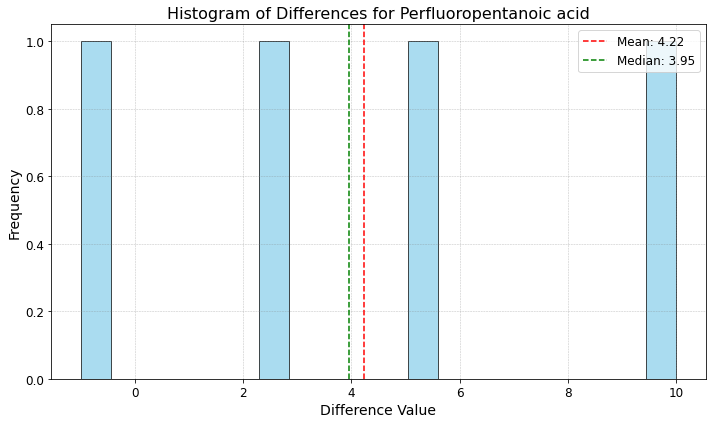

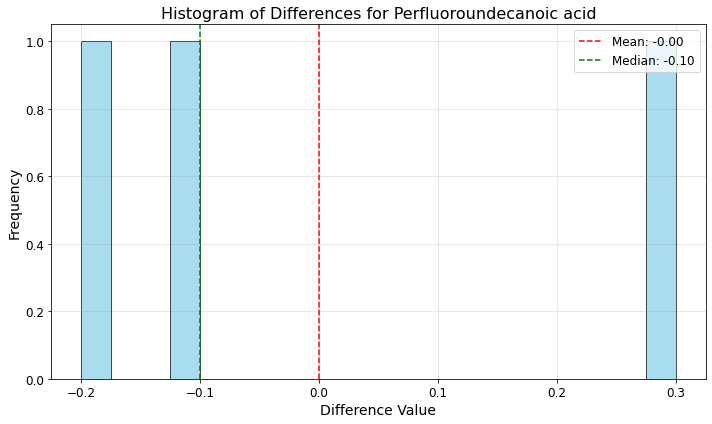

In [123]:
# Group the DataFrame by 'PFAS Compound_1633'
groups = quant_df.groupby('PFAS Compound_1633')

for compound, group in groups:
    # Ensure there are enough data points for a meaningful histogram
    if len(group) > 1:
        plt.figure(figsize=(10, 6))
        n, bins, patches = plt.hist(group['Diff_1633-5371'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

        # Formatting the plot
        plt.title(f'Histogram of Differences for {compound}', fontsize=16)
        plt.xlabel('Difference Value', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Adding vertical lines for mean and median of the differences
        mean_val = np.mean(group['Diff_1633-5371'])
        median_val = np.median(group['Diff_1633-5371'])
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

        # Adding a legend
        plt.legend(loc='upper right', fontsize=12)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for {compound} to generate a histogram.")


### By PFAS Class

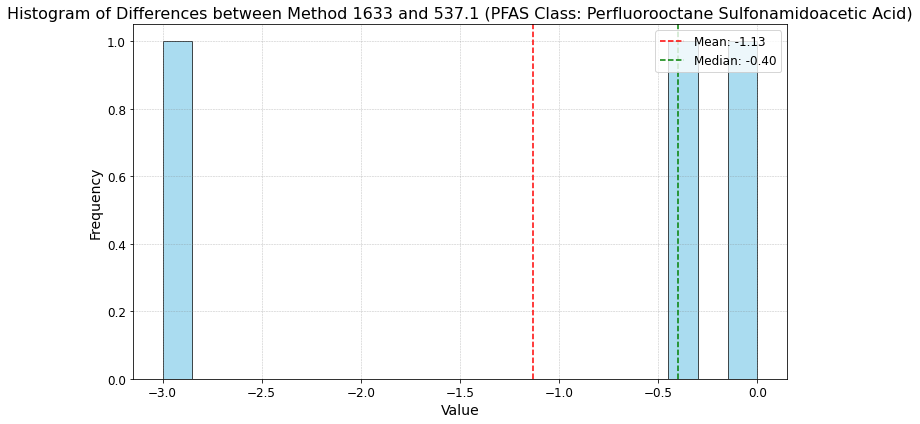

In [125]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Step 1: Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Differences between Method 1633 and 537.1 (PFAS Class: Perfluorooctane Sulfonamidoacetic Acid)', fontsize=16)  # Title of the histogram
plt.xlabel('Value', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median
mean_val = np.mean(filtered_df['Diff_1633-5371'])
median_val = np.median(filtered_df['Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

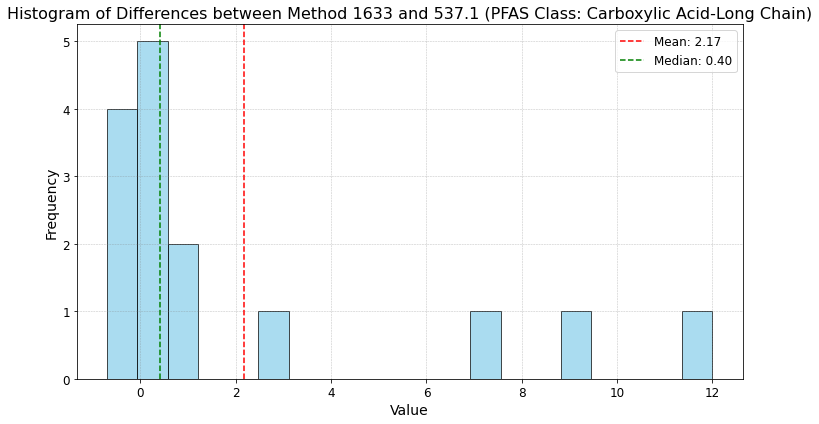

In [126]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Step 1: Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Differences between Method 1633 and 537.1 (PFAS Class: Carboxylic Acid-Long Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Value', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median
mean_val = np.mean(filtered_df['Diff_1633-5371'])
median_val = np.median(filtered_df['Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

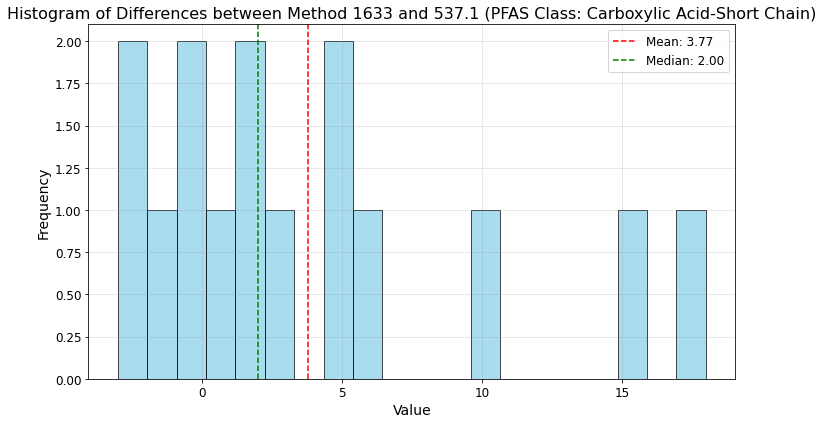

In [127]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Step 1: Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Differences between Method 1633 and 537.1 (PFAS Class: Carboxylic Acid-Short Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Value', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median
mean_val = np.mean(filtered_df['Diff_1633-5371'])
median_val = np.median(filtered_df['Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\rodriguezc\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


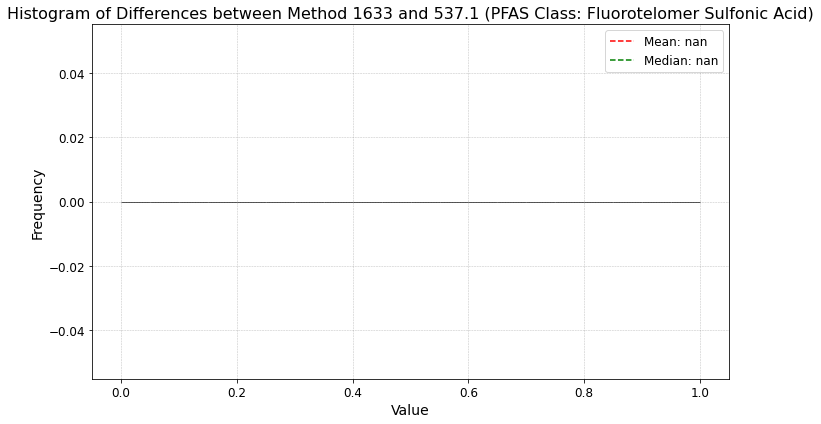

In [128]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Step 1: Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Differences between Method 1633 and 537.1 (PFAS Class: Fluorotelomer Sulfonic Acid)', fontsize=16)  # Title of the histogram
plt.xlabel('Value', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median
mean_val = np.mean(filtered_df['Diff_1633-5371'])
median_val = np.median(filtered_df['Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

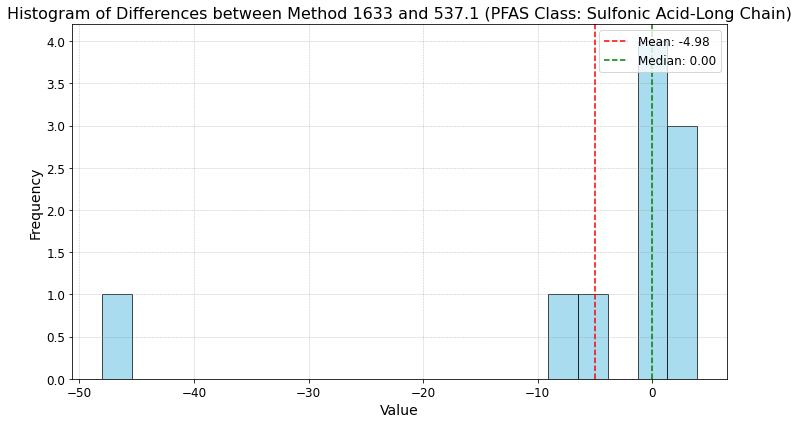

In [129]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Step 1: Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Differences between Method 1633 and 537.1 (PFAS Class: Sulfonic Acid-Long Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Value', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median
mean_val = np.mean(filtered_df['Diff_1633-5371'])
median_val = np.median(filtered_df['Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

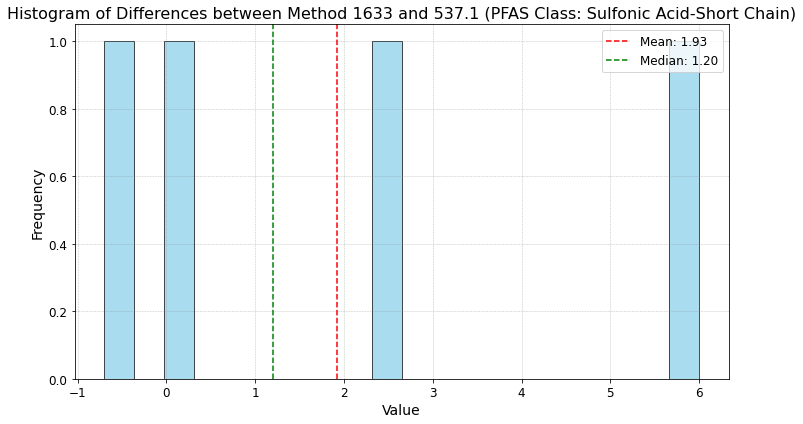

In [130]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])
# Step 1: Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
n, bins, patches = plt.hist(filtered_df['Diff_1633-5371'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Format the plot
plt.title('Histogram of Differences between Method 1633 and 537.1 (PFAS Class: Sulfonic Acid-Short Chain)', fontsize=16)  # Title of the histogram
plt.xlabel('Value', fontsize=14)  # X-axis label
plt.ylabel('Frequency', fontsize=14)  # Y-axis label

# Optional: Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: Customizing ticks
plt.xticks(fontsize=12)  # Font size for X-axis ticks
plt.yticks(fontsize=12)  # Font size for Y-axis ticks

# Optional: Adding vertical lines for mean and median
mean_val = np.mean(filtered_df['Diff_1633-5371'])
median_val = np.median(filtered_df['Diff_1633-5371'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')

# Optional: Adding a legend
plt.legend(loc='upper right', fontsize=12)

# Step 3: Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

## Kolmogorov-Smirnov test 

In [140]:
#Prepare data
#The test assumes that the samples are independent. Measurements within each method and between methods should not be paired or matched.
#This means we want to compare all quant results for both methods but they don't necessarily need to both be quant detection class.
quant_df_1633=subset_df_1633[subset_df_1633['Detection Class']=='Quant']
quant_df_537=subset_df_537[subset_df_537['Detection Class']=='Quant']

In [142]:
quant_df_1633.columns

Index(['Result', 'Analysis Method', 'Sample Location', 'Type', 'Sample Date',
       'PFAS Compound', 'MDL', 'Detection Class', 'Quant Only Incl Qual Flags',
       'Quant Incl Estimates Incl Qual Flags',
       'All (w BDL= MDL/2) Incl Qual Flags', 'Units', 'ChainLength',
       'Dominant Contributor', 'Sector', 'unique_key'],
      dtype='object')

### All Quant

In [143]:
# Perform the two-sample K-S test
statistic, p_value = ks_2samp(quant_df_1633['Quant Only Incl Qual Flags'], quant_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")


K-S statistic: 0.2676056338028169
P-value: 0.005713731726958771


### By PFAS Compound

In [148]:
# Identify common PFAS compounds in both dataframes
common_compounds = set(quant_df_1633['PFAS Compound']).intersection(set(quant_df_537['PFAS Compound']))
# Results container
ks_results = []

for compound in common_compounds:
    # Filter each dataframe for the current PFAS compound
    data_1633 = quant_df_1633[quant_df_1633['PFAS Compound'] == compound]['Quant Only Incl Qual Flags'].dropna()
    data_537 = quant_df_537[quant_df_537['PFAS Compound'] == compound]['Quant Only Incl Qual Flags'].dropna()
    
    # Ensure both groups have enough data points
    if len(data_1633) > 1 and len(data_537) > 1:
        # Perform the K-S test
        statistic, p_value = ks_2samp(data_1633, data_537)
        
        # Store the results
        ks_results.append((compound, statistic, p_value))
    else:
        print(f"Not enough data for {compound} to perform K-S test.")

# Optionally, convert the results list to a DataFrame for better visualization
ks_results_df = pd.DataFrame(ks_results, columns=['PFAS Compound', 'K-S Statistic', 'P-Value'])
print(ks_results_df)


Not enough data for Perfluorooctanesulfonamide to perform K-S test.
                          PFAS Compound  K-S Statistic   P-Value
0                Perfluorononanoic acid       0.333333  0.981818
1               Perfluoropentanoic acid       0.545455  0.272527
2                              NMeFOSAA       0.750000  0.400000
3                              NEtFOSAA       1.000000  0.200000
4                Perfluorobutanoic acid       0.500000  0.678571
5         Perfluorooctanoic acid (PFOA)       0.294118  0.803144
6              Perfluoroundecanoic acid       0.400000  0.857143
7                Perfluorodecanoic acid       0.333333  0.811189
8          Perfluorobutanesulfonic acid       0.550000  0.259740
9               Perfluoroheptanoic acid       0.300000  0.837589
10  Perfluorooctanesulfonic acid (PFOS)       0.526786  0.094030
11         Perfluorohexanesulfonic acid       0.466667  0.678571
12             Perfluorododecanoic acid       0.400000  0.857143
13               Perfl

### By PFAS Class

In [153]:
subset_df_1633=subset_df[subset_df['Analysis Method']==1633]
subset_df_537=subset_df[subset_df['Analysis Method']=='537.1 (mod)']

In [154]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.262987012987013
P-value: 0.31200187396569745


In [155]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.24453211517165005
P-value: 0.011361884918497323


In [156]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.49974437627811863
P-value: 2.483050607493542e-05


In [157]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_FluorotelomerSulfonicAcid)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.015625
P-value: 1


In [159]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_PerfluorooctaneSulfonamideEthanol)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.03409090909090909
P-value: 1


In [160]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.16965417345645484
P-value: 0.2189299673940811


In [162]:
# Filter the DataFrame to include only the specified compounds
filtered_df_1633 = subset_df_1633[subset_df_1633['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags'])
filtered_df_537 = subset_df_537[subset_df_537['PFAS Compound'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags'])

# Perform the two-sample K-S test
statistic, p_value = ks_2samp(filtered_df_1633['Quant Only Incl Qual Flags'], filtered_df_537['Quant Only Incl Qual Flags'])

print(f"K-S statistic: {statistic}")
print(f"P-value: {p_value}")

K-S statistic: 0.22723253757736517
P-value: 0.5254750529796883


## Bar Chart Visualization

### All Quant Pairs by PFAS Compound Separated by PFAS Groups Comparison between Method 1633 and 537.1

In [163]:
quant_df

,Result_1633,Analysis Method_1633,Sample Location_1633,Type_1633,Sample Date_1633,PFAS Compound_1633,MDL_1633,Detection Class_1633,Quant Only Incl Qual Flags_1633,Quant Incl Estimates Incl Qual Flags_1633,...,MDL_5371,Detection Class_5371,Quant Only Incl Qual Flags_5371,Quant Incl Estimates Incl Qual Flags_5371,All (w BDL= MDL/2) Incl Qual Flags_5371,Units_5371,ChainLength_5371,Dominant Contributor_5371,Sector_5371,Diff_1633-5371
11,10,1633,Durham Biosolids,Biosolids,2023-12-05,NMeFOSAA,NaN,Quant,10.0,10.0,...,NaN,Quant,13.0,13.0,13.0,ppb_wt,8.0,NaN,NaN,-3.0
15,4,1633,Durham Biosolids,Biosolids,2023-12-05,Perfluorodecanoic acid,NaN,Quant,4.0,4.0,...,NaN,Quant,3.5,3.5,3.5,ppb_wt,10.0,NaN,NaN,0.5
17,1.6,1633,Durham Biosolids,Biosolids,2023-12-05,Perfluorododecanoic acid,NaN,Quant,1.6,1.6,...,NaN,Quant,2.3,2.3,2.3,ppb_wt,12.0,NaN,NaN,-0.7
25,10,1633,Durham Biosolids,Biosolids,2023-12-05,Perfluorooctanesulfonic acid (PFOS),NaN,Quant,10.0,10.0,...,NaN,Quant,14.0,14.0,14.0,ppb_wt,8.0,NaN,NaN,-4.0
31,1.8,1633,Durham Biosolids,Biosolids,2023-12-05,Perfluoroundecanoic acid,NaN,Quant,1.8,1.8,...,NaN,Quant,2.0,2.0,2.0,ppb_wt,11.0,NaN,NaN,-0.2
45,7,1633,Durham Effluent,Effluent,2023-12-05,Perfluorobutanesulfonic acid,NaN,Quant,7.0,7.0,...,NaN,Quant,4.6,4.6,4.6,ppt_wt_v,4.0,NaN,NaN,2.4
52,3,1633,Durham Effluent,Effluent,2023-12-05,Perfluoroheptanoic acid,NaN,Quant,3.0,3.0,...,NaN,Quant,2.6,2.6,2.6,ppt_wt_v,7.0,NaN,NaN,0.4
53,2.6,1633,Durham Effluent,Effluent,2023-12-05,Perfluorohexanesulfonic acid,NaN,Quant,2.6,2.6,...,NaN,Quant,2.0,2.0,2.0,ppt_wt_v,6.0,NaN,NaN,0.6
54,11,1633,Durham Effluent,Effluent,2023-12-05,Perfluorohexanoic acid,NaN,Quant,11.0,11.0,...,NaN,Quant,9.0,9.0,9.0,ppt_wt_v,6.0,NaN,NaN,2.0
58,8.7,1633,Durham Effluent,Effluent,2023-12-05,Perfluorooctanesulfonic acid (PFOS),NaN,Quant,8.7,8.7,...,NaN,Quant,5.9,5.9,5.9,ppt_wt_v,8.0,NaN,NaN,2.8


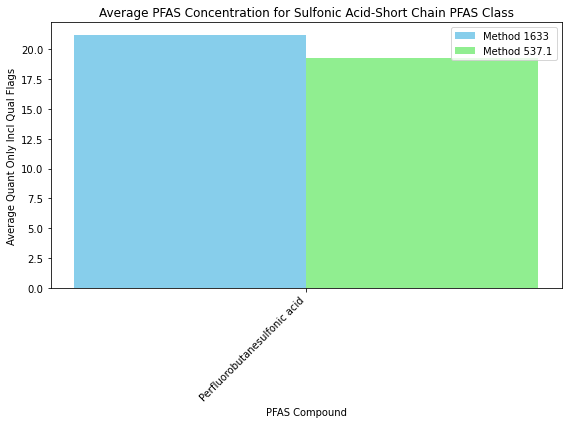

In [172]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Sulfonic Acid-Short Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

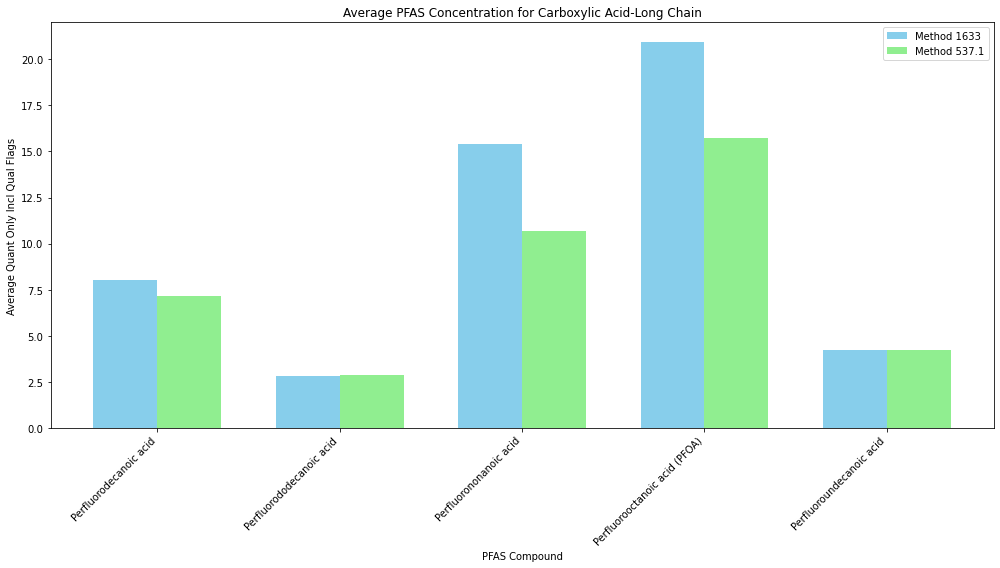

In [174]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Carboxylic Acid-Long Chain')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

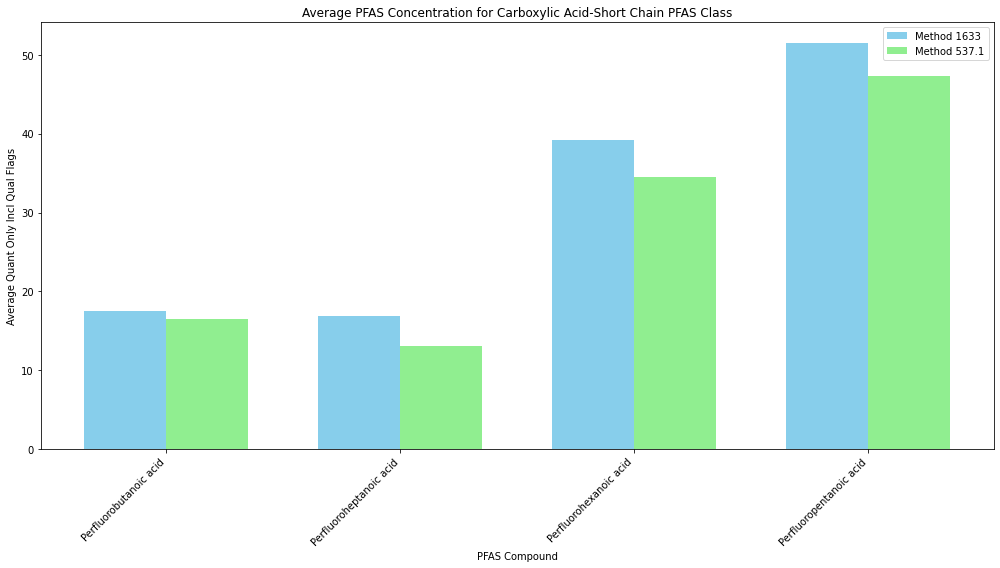

In [175]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_CarboxylicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Carboxylic Acid-Short Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

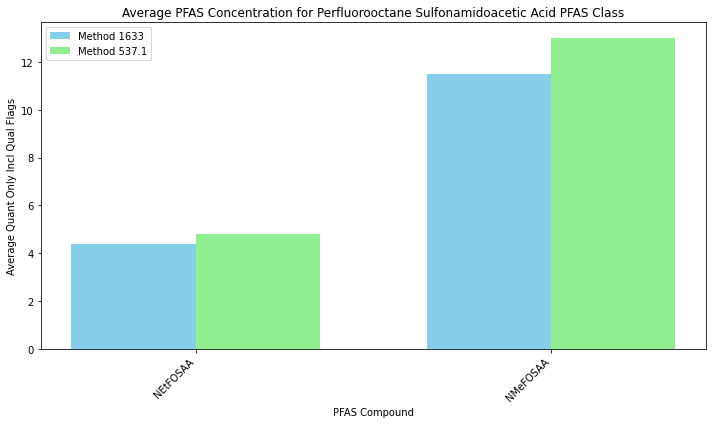

In [177]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_PerfluorooctaneSulfonamidoaceticAcid)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Perfluorooctane Sulfonamidoacetic Acid PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

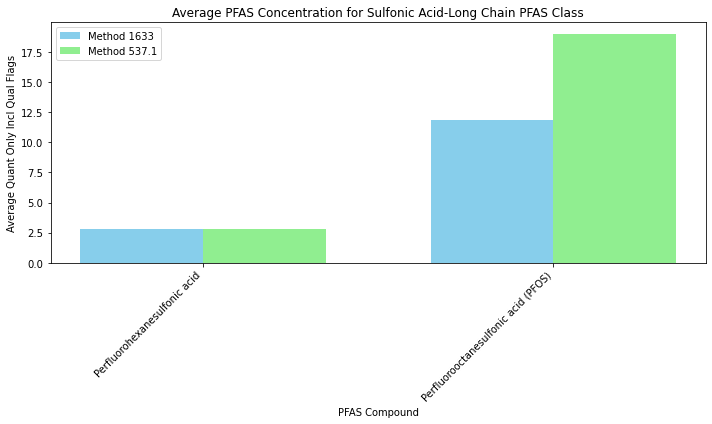

In [178]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Long)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Sulfonic Acid-Long Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()

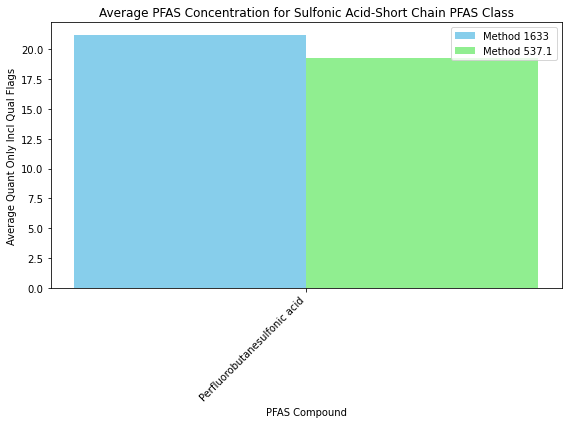

In [180]:
# Filter the DataFrame to include only the specified compounds
filtered_df = quant_df[quant_df['PFAS Compound_1633'].isin(pfas_compounds_SulfonicAcid_Short)].dropna(subset=['Quant Only Incl Qual Flags_1633', 'Quant Only Incl Qual Flags_5371'])

# Calculate the mean for each PFAS Compound
average_df = filtered_df.groupby('PFAS Compound_1633').agg({
    'Quant Only Incl Qual Flags_1633': 'mean',
    'Quant Only Incl Qual Flags_5371': 'mean'
}).reset_index()

# Set the positions and width for the bars
positions = np.arange(len(average_df['PFAS Compound_1633']))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each method
bars_1633 = ax.bar(positions - width/2, average_df['Quant Only Incl Qual Flags_1633'], width, label='Method 1633', color='skyblue')
bars_5371 = ax.bar(positions + width/2, average_df['Quant Only Incl Qual Flags_5371'], width, label='Method 537.1', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('PFAS Compound')
ax.set_ylabel('Average Quant Only Incl Qual Flags')
ax.set_title('Average PFAS Concentration for Sulfonic Acid-Short Chain PFAS Class')
ax.set_xticks(positions)
ax.set_xticklabels(average_df['PFAS Compound_1633'], rotation=45, ha="right")
ax.legend()

fig.tight_layout()

plt.show()